# fixed-offset

Sweep different fixed-offset prefetchers over:
- mcf_46B
- libquantum_1210B


In [6]:
from collections import defaultdict
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils import plots, tables
#%matplotlib widget

In [7]:
# Knobs
paths = {
    'degree1_fixed_offset': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_fixed_offset.csv',
}
metrics  = [
    'ipc_improvement', 
    #'L2C_issued_prefetches', 
    #'L2C_accuracy', 
    'L2C_coverage',
    'L2C_hit_ratio',
    #'L2C_cum_hit_ratio',
    'L2C_avg_miss_latency',
    'L2C_avg_access_latency',
    #'L2C_mpki',
    'LLC_coverage',
    'LLC_hit_ratio',
    #'LLC_cum_hit_ratio',
    'LLC_avg_miss_latency',
    'LLC_avg_access_latency',
    #'LLC_mpki',
    'amat'
    #'L2C_mpki_reduction', 
]
offsets = list(range(-63, 63))
dpi = 150

# Plots (suites)
Fix prefetch degree to 1 for everything.

In [8]:
def plot_fixed_offsets(offsets_df, trace, metric, dpi=None, figsize=None, lines={}, best_offset=None):
    """Plot the fixed offset results."""
    fig, ax = plt.subplots(dpi=dpi, figsize=figsize)
    
    X, y = [], []
    X_best, y_best = [], []
    for offset, df in offsets_df.items():
        df = df[df.cpu0_full_trace == trace]
        X.append(offset)
        val = df[metric]
        val = val.item() if len(val) == 1 else np.nan
        y.append(val)

        if offset == best_offset:
            X_best.append(offset)
            y_best.append(val)
    
    ax.bar(X, y, color='C3', zorder=1)
    ax.bar(X_best, y_best, color='C4', zorder=2)

    # Comparison lines
    line_colors = {
        'bo -zero': 'C2',
        'cygnus tuned -fallback -zero': 'C1',
        'cygnus tuned timely acc': 'C1',
        'pythia tuned -fallback -zero': 'C0'
    }
    for k, v in lines.items():
        ax.axhline(v, color=line_colors[k])
        ax.text(min(offsets_df), v, k,  ha='left', va='bottom', color=line_colors[k])

    ax.set_axisbelow(True)
    ax.grid(zorder=0)   
    ax.set_xlim(-64, 64)
    ax.set_xticks(np.arange(-64, 64, 4))

    ax.set_xlabel('Fixed offset')
    ax.set_ylabel(metric)
    fig.suptitle(f'{trace} {metric}')
    plt.show()

In [9]:
reload(tables)
dfs = tables.load_stats_csv_next_line(paths['degree1_fixed_offset'], offsets=offsets)

## mcf_46B

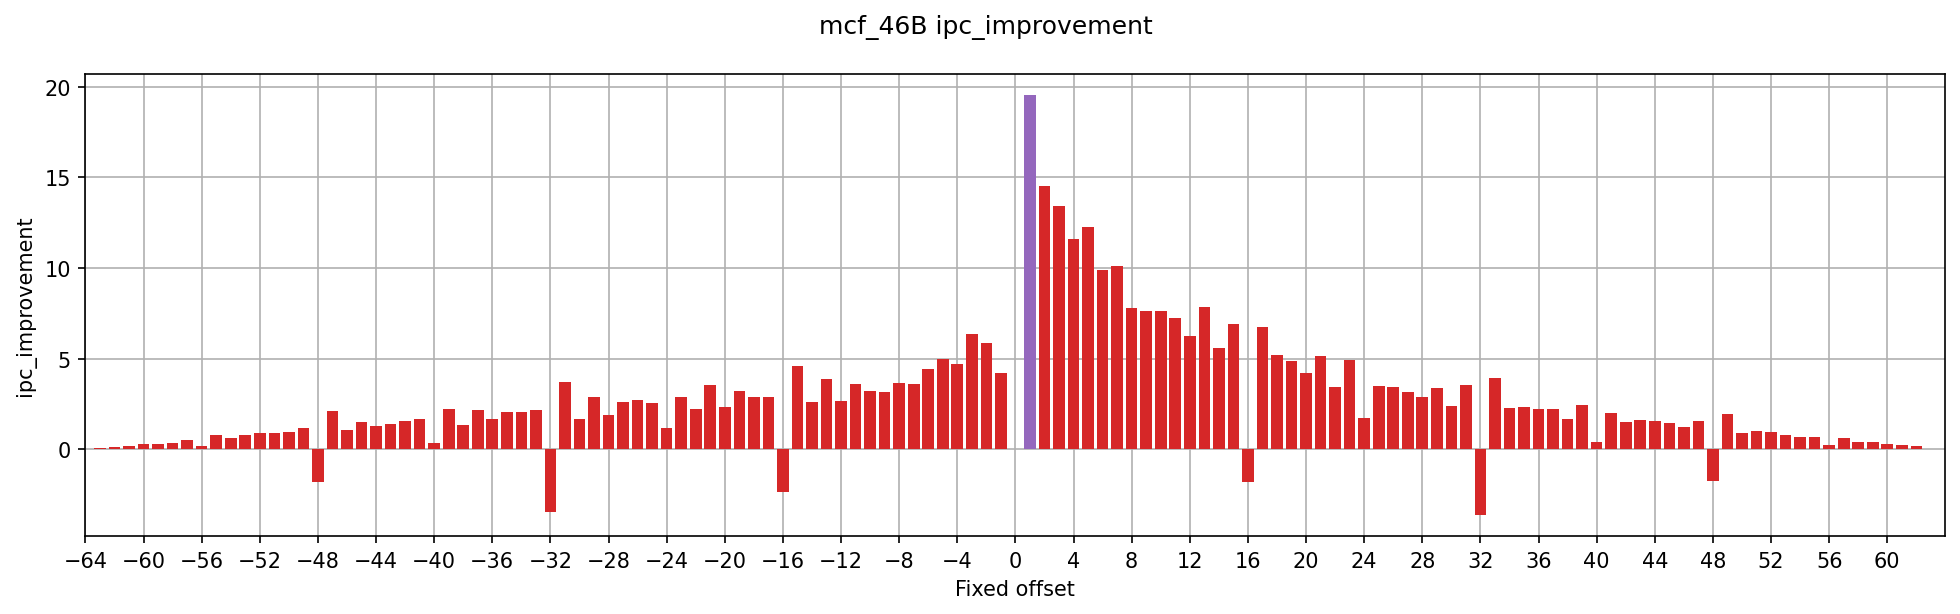

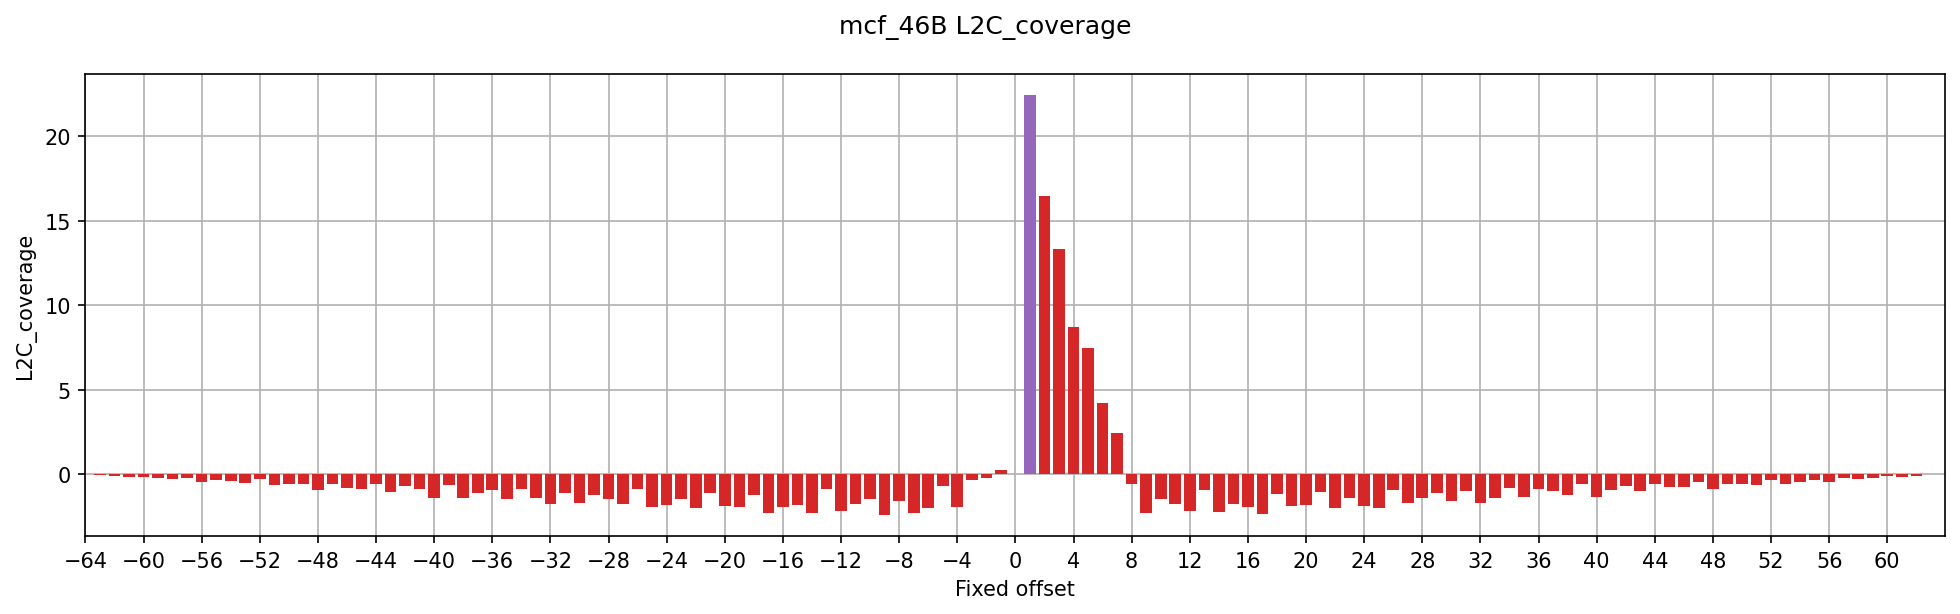

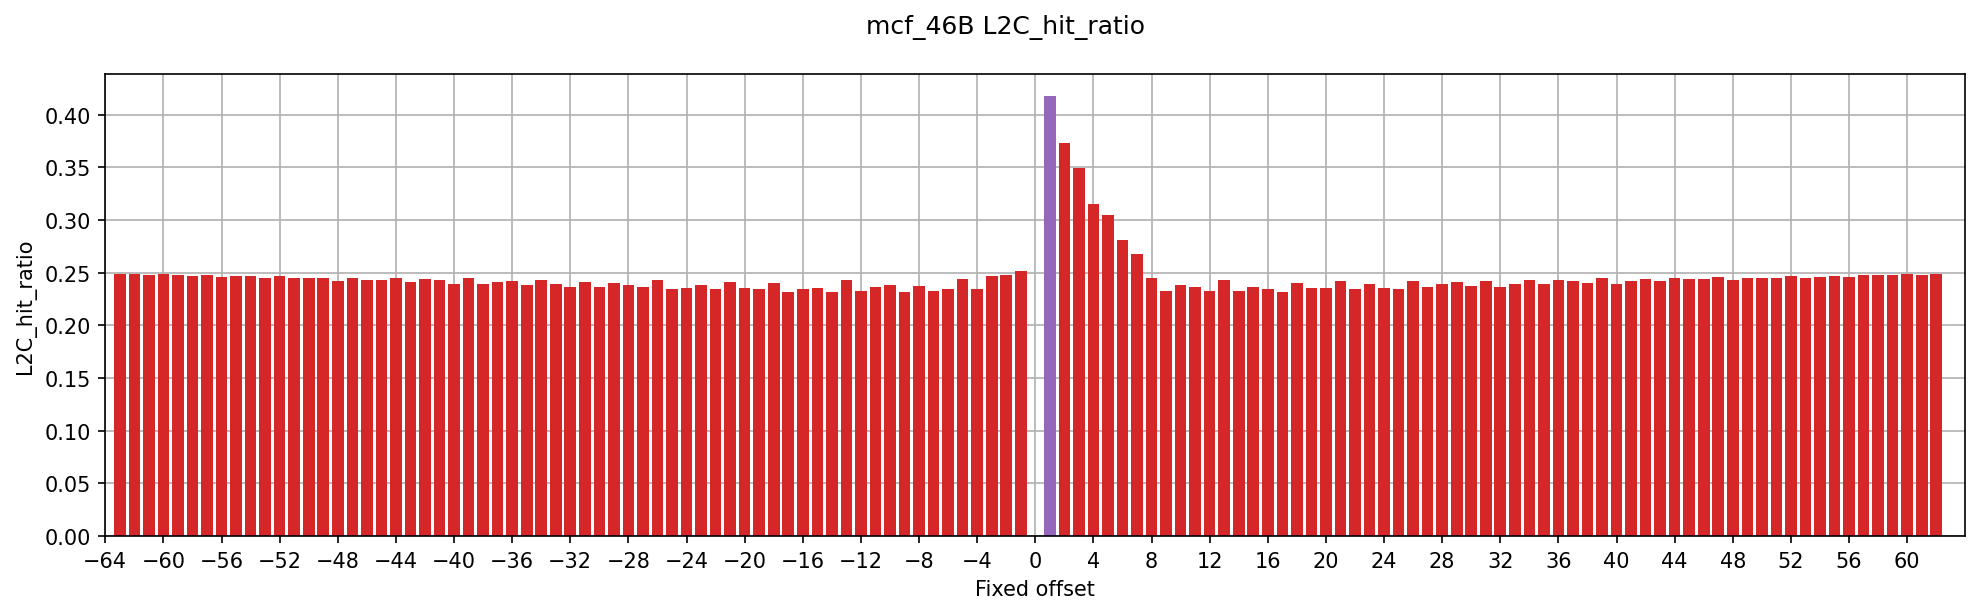

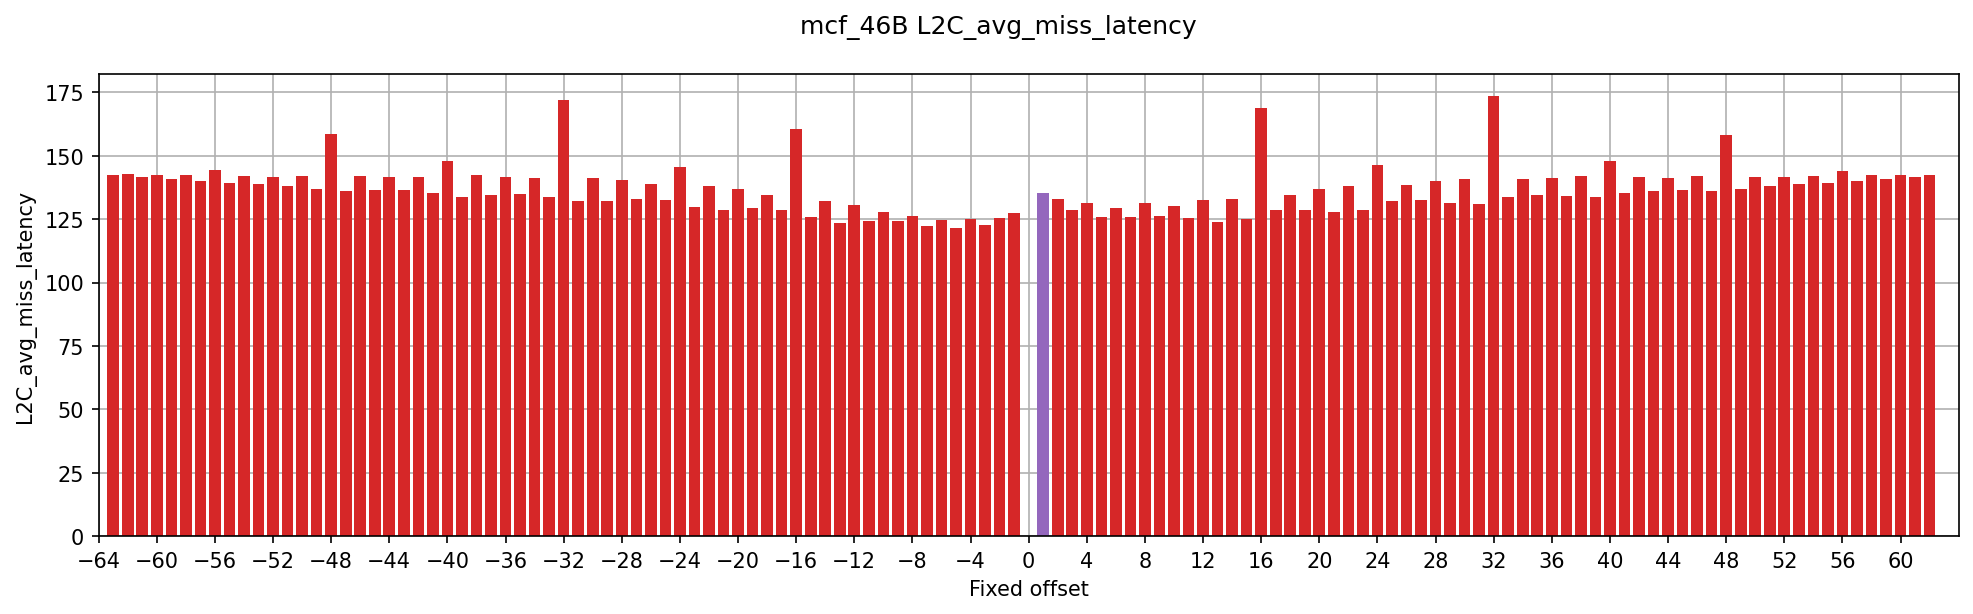

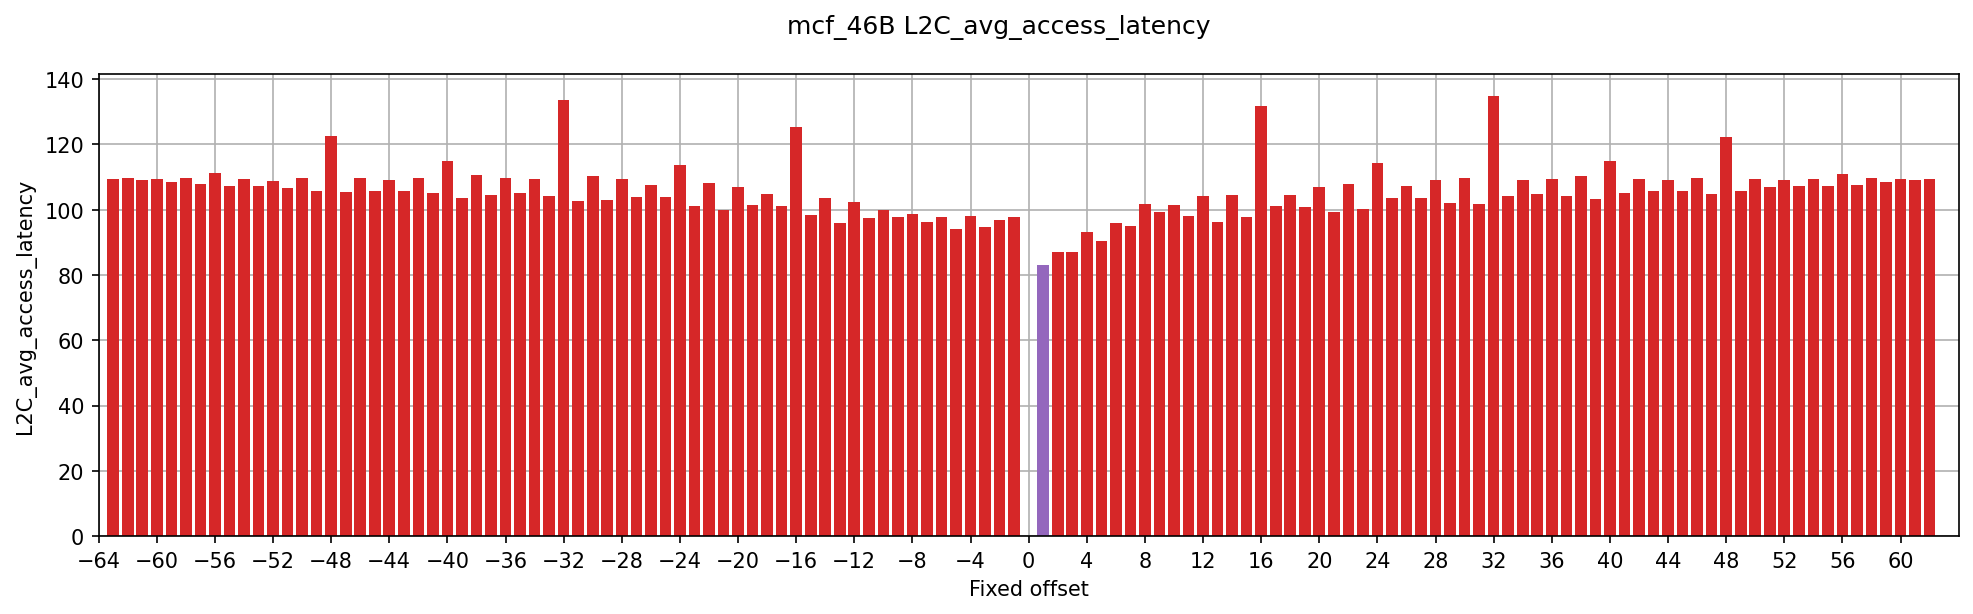

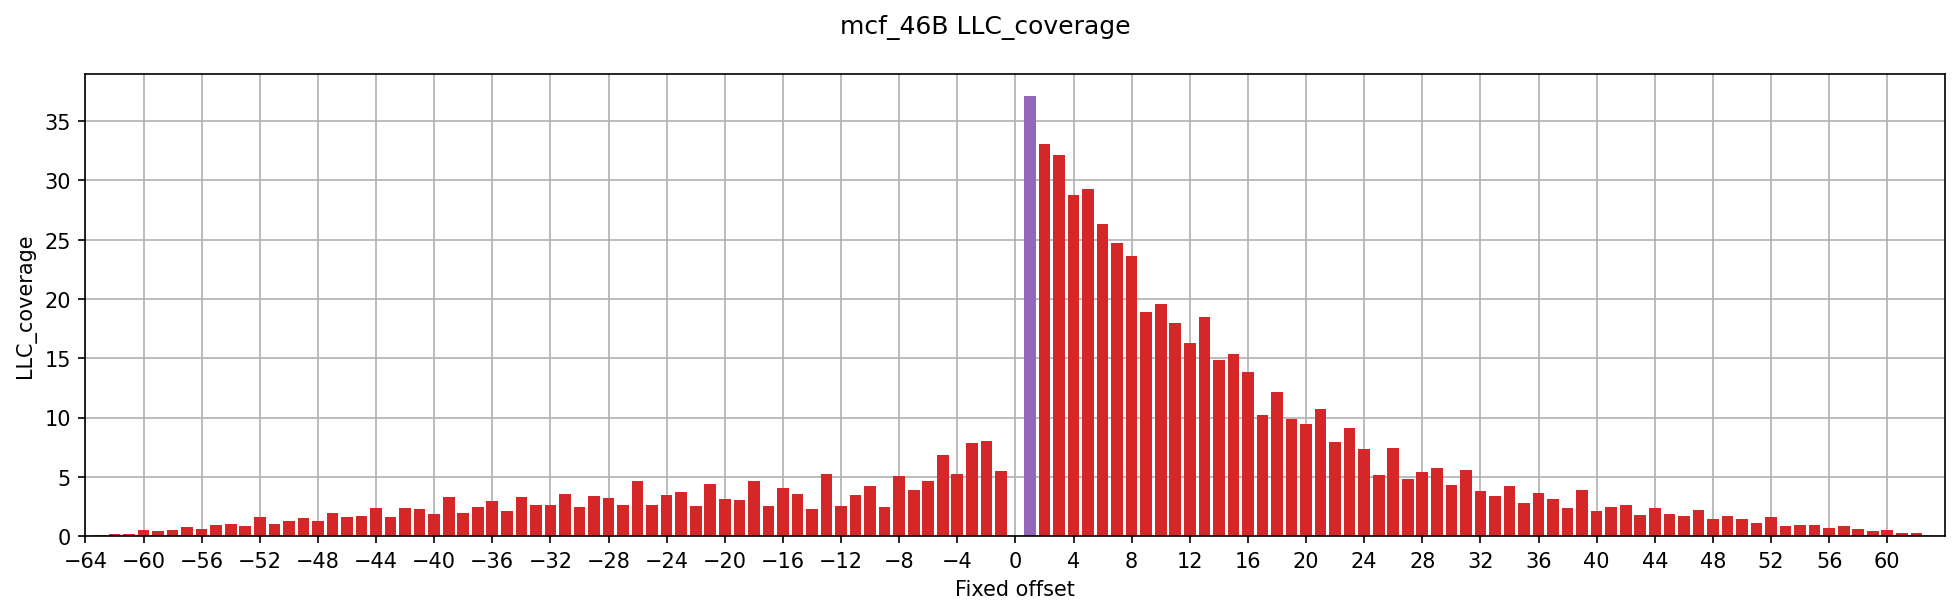

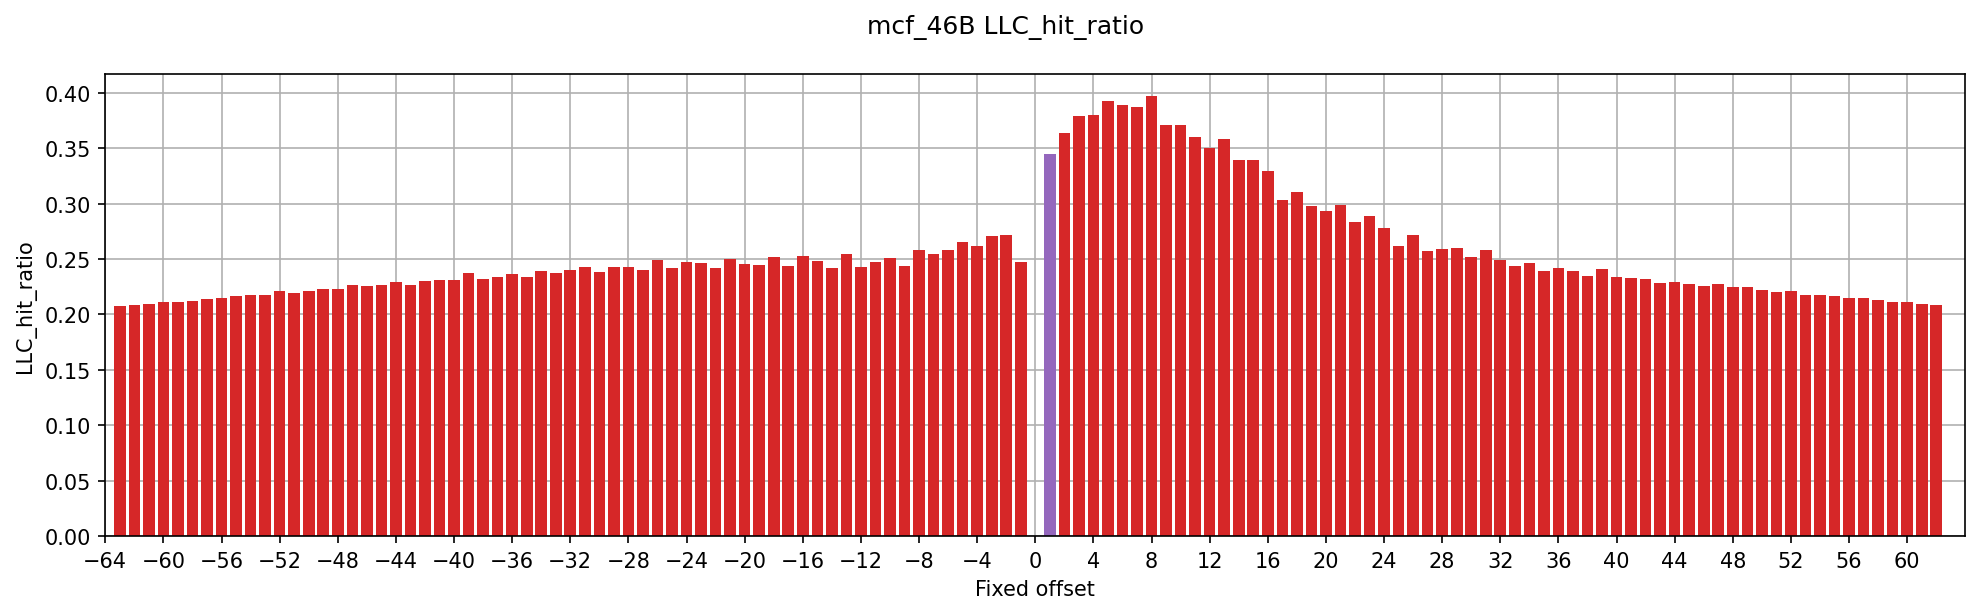

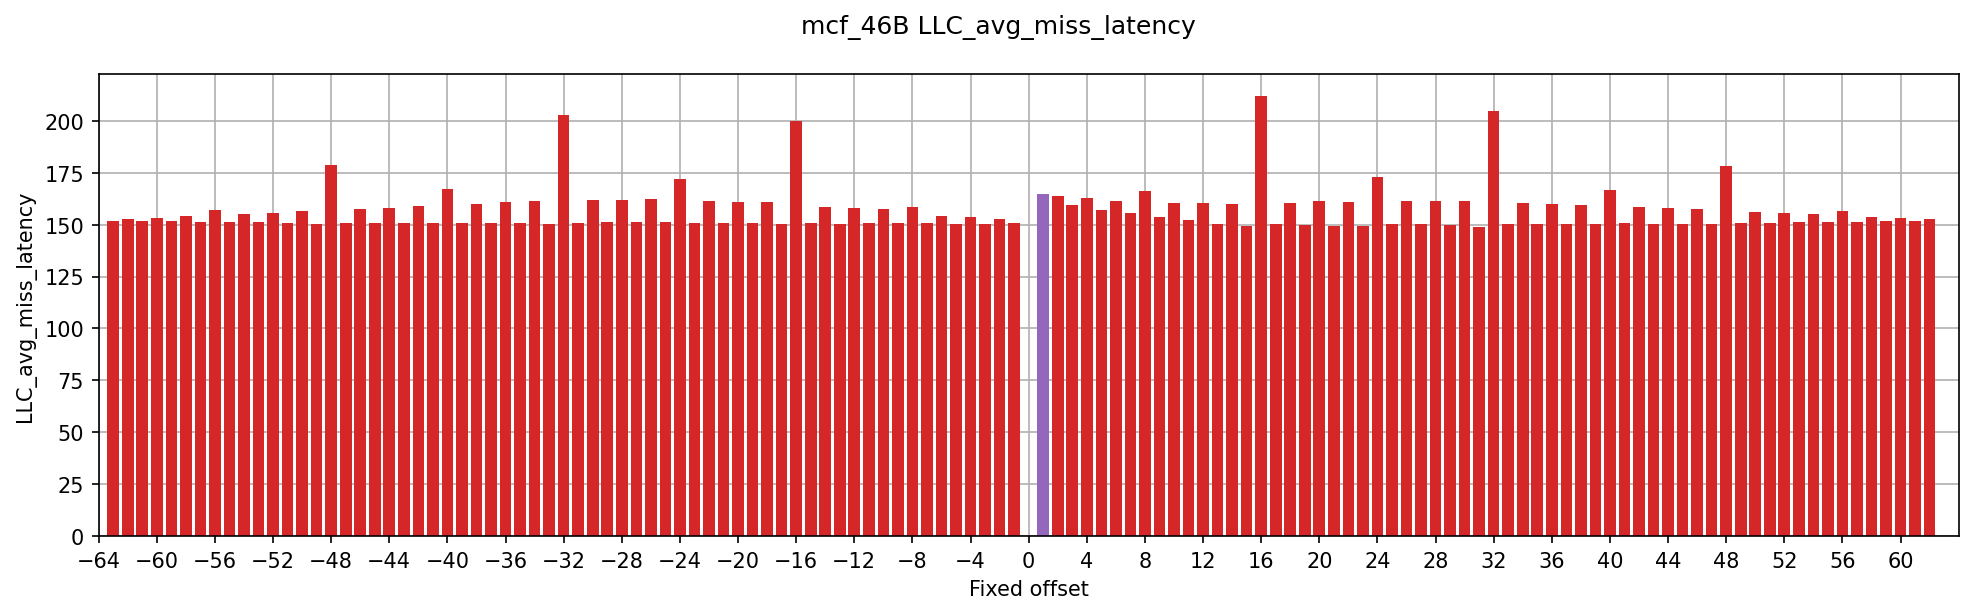

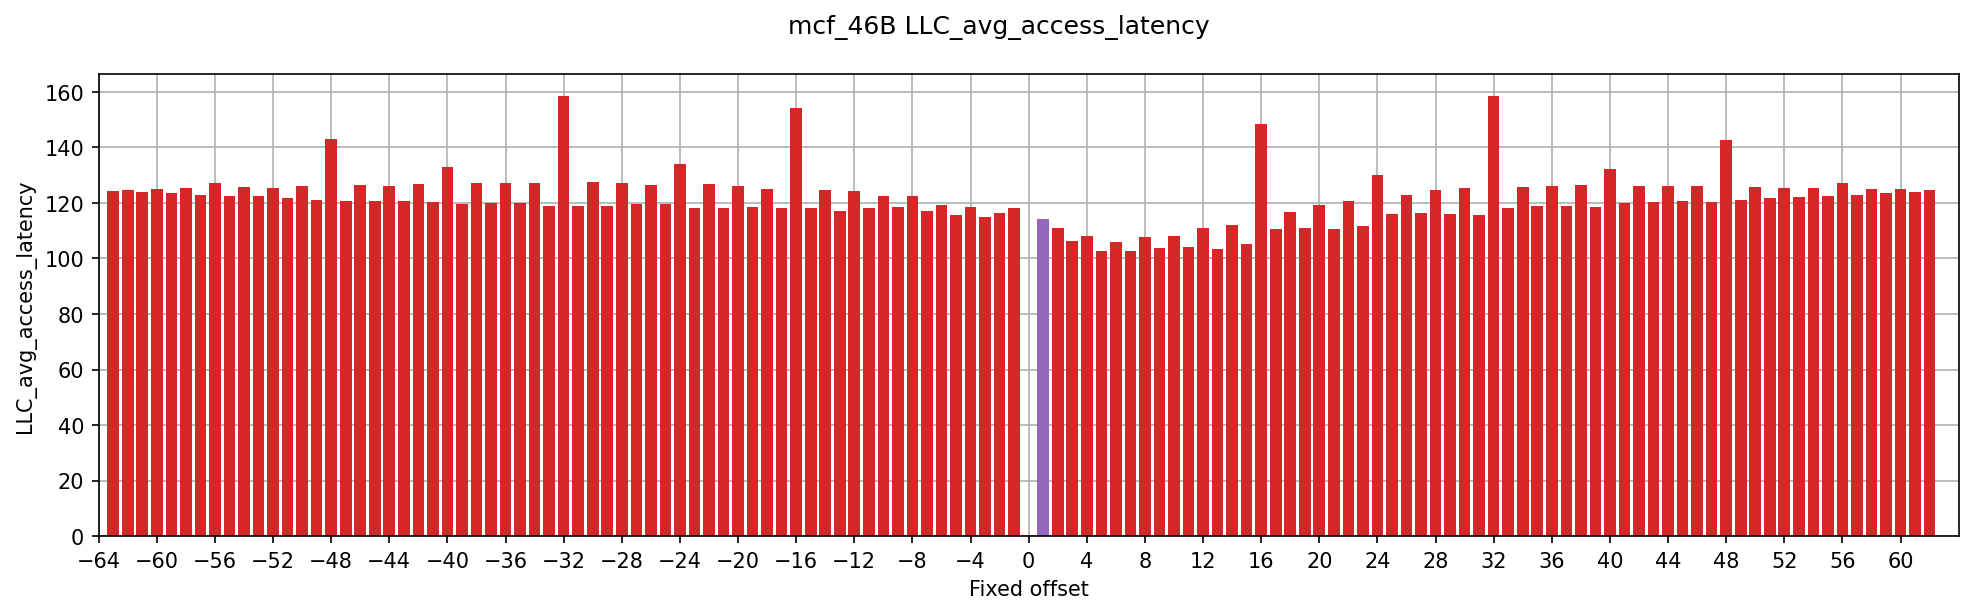

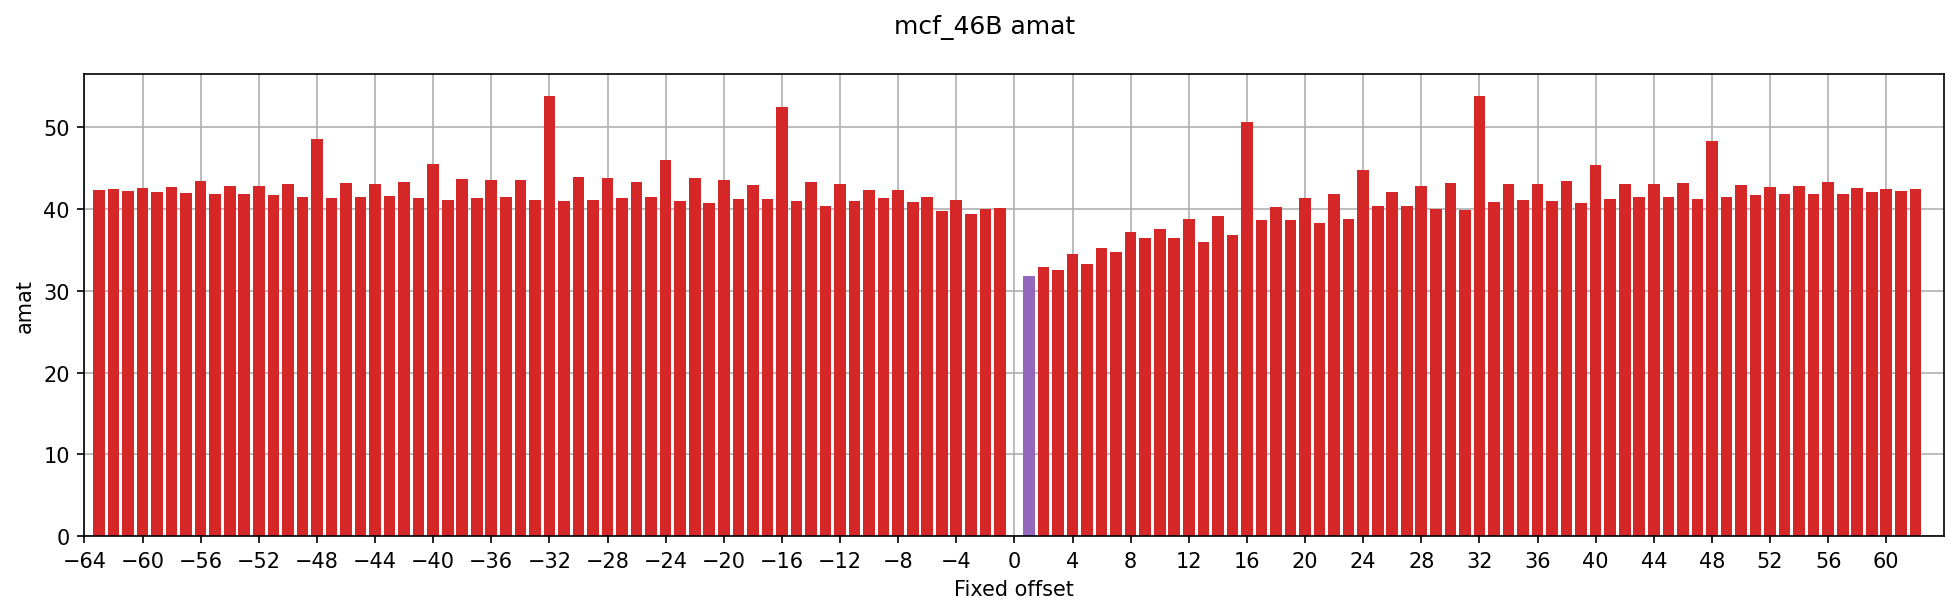

In [11]:
lines = {
    # 'bo -zero': 12.788294, 
    # 'cygnus tuned -fallback -zero': 15.680260,
    # 'cygnus tuned timely acc': 4.229684,
    # 'pythia tuned -fallback -zero': 15.022473,	
}
for metric in metrics:
    plot_fixed_offsets(dfs, 'mcf_46B', metric, dpi=dpi, figsize=(16, 4), lines=lines, best_offset=1)

## libquantum_1210B

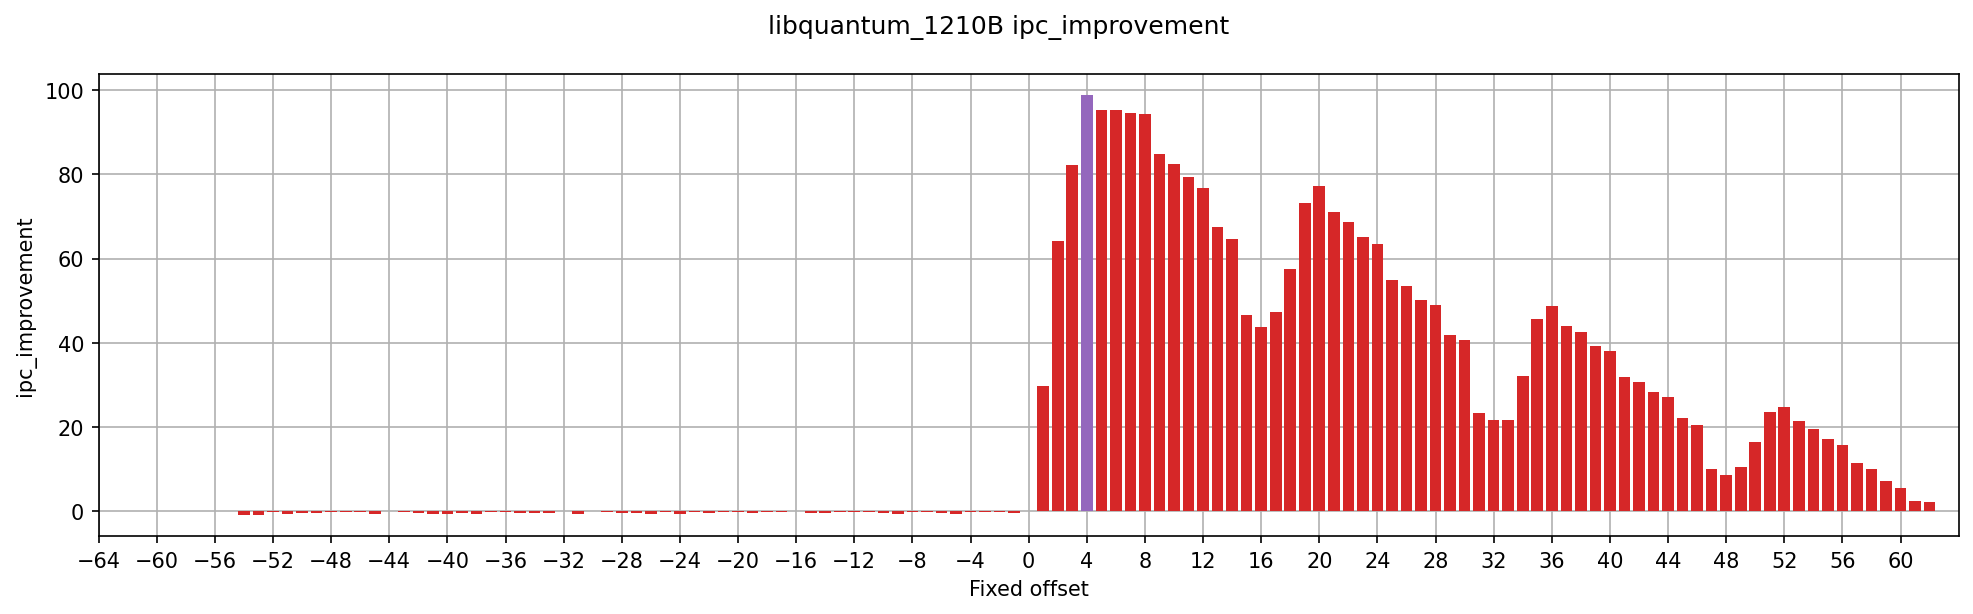

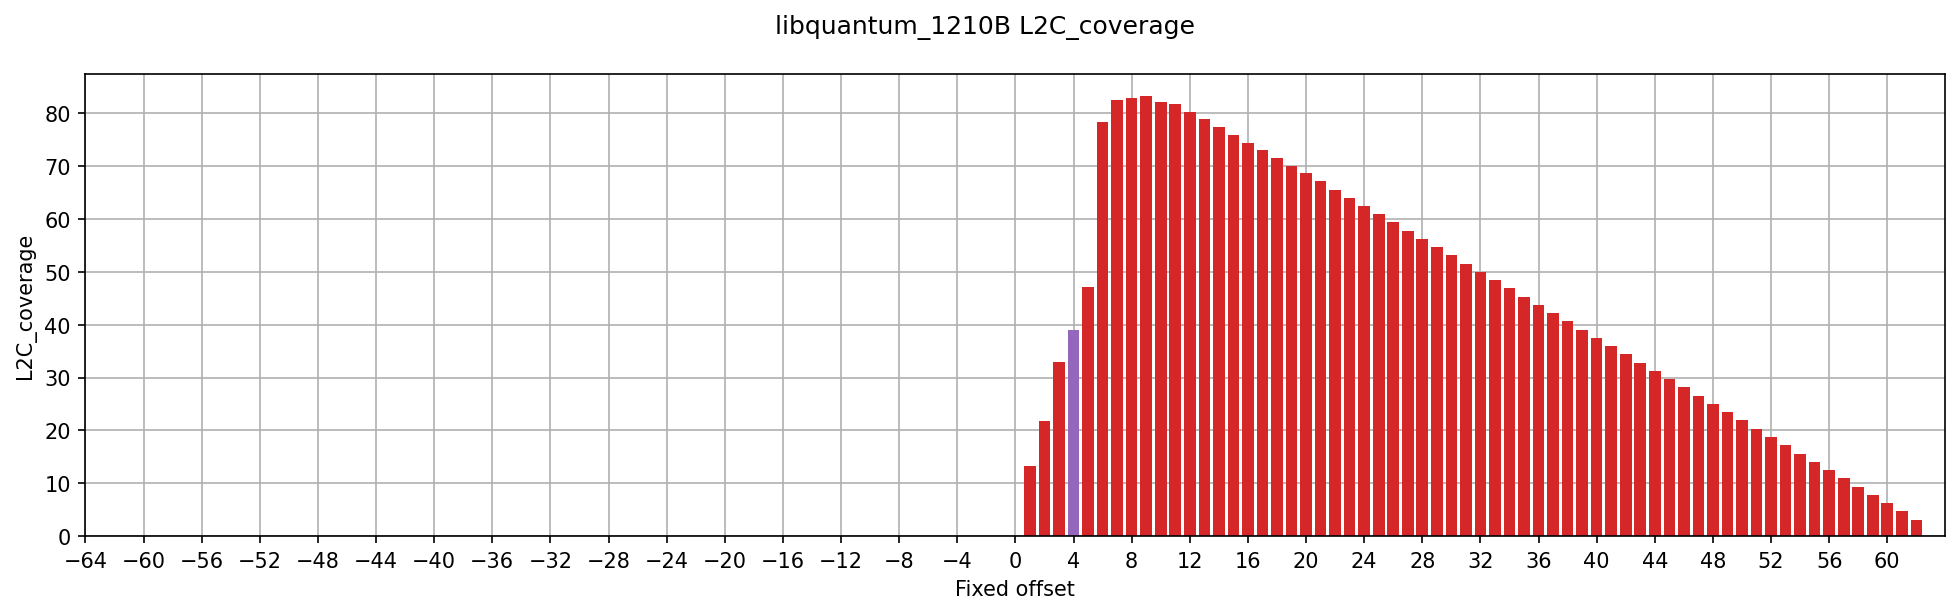

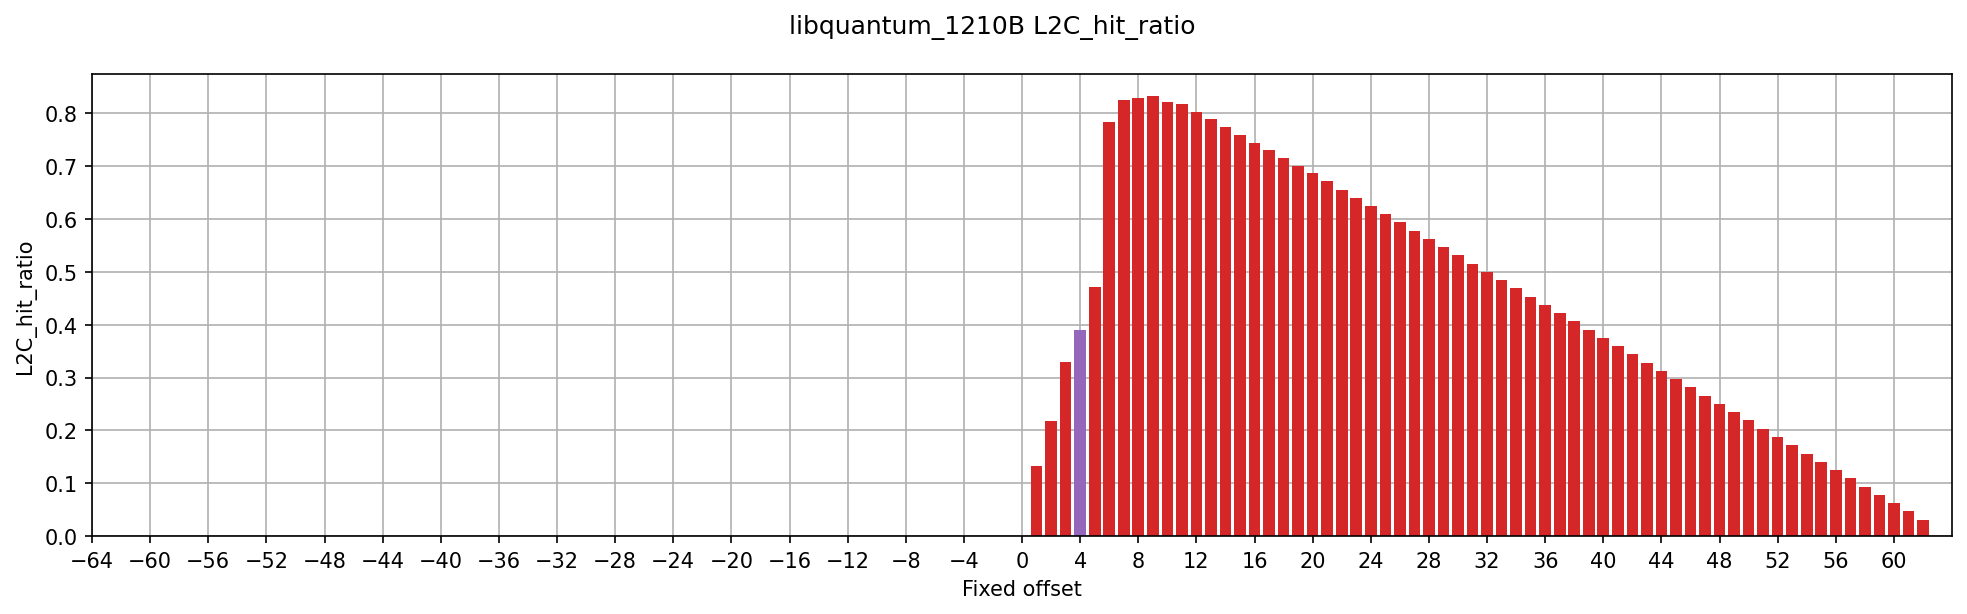

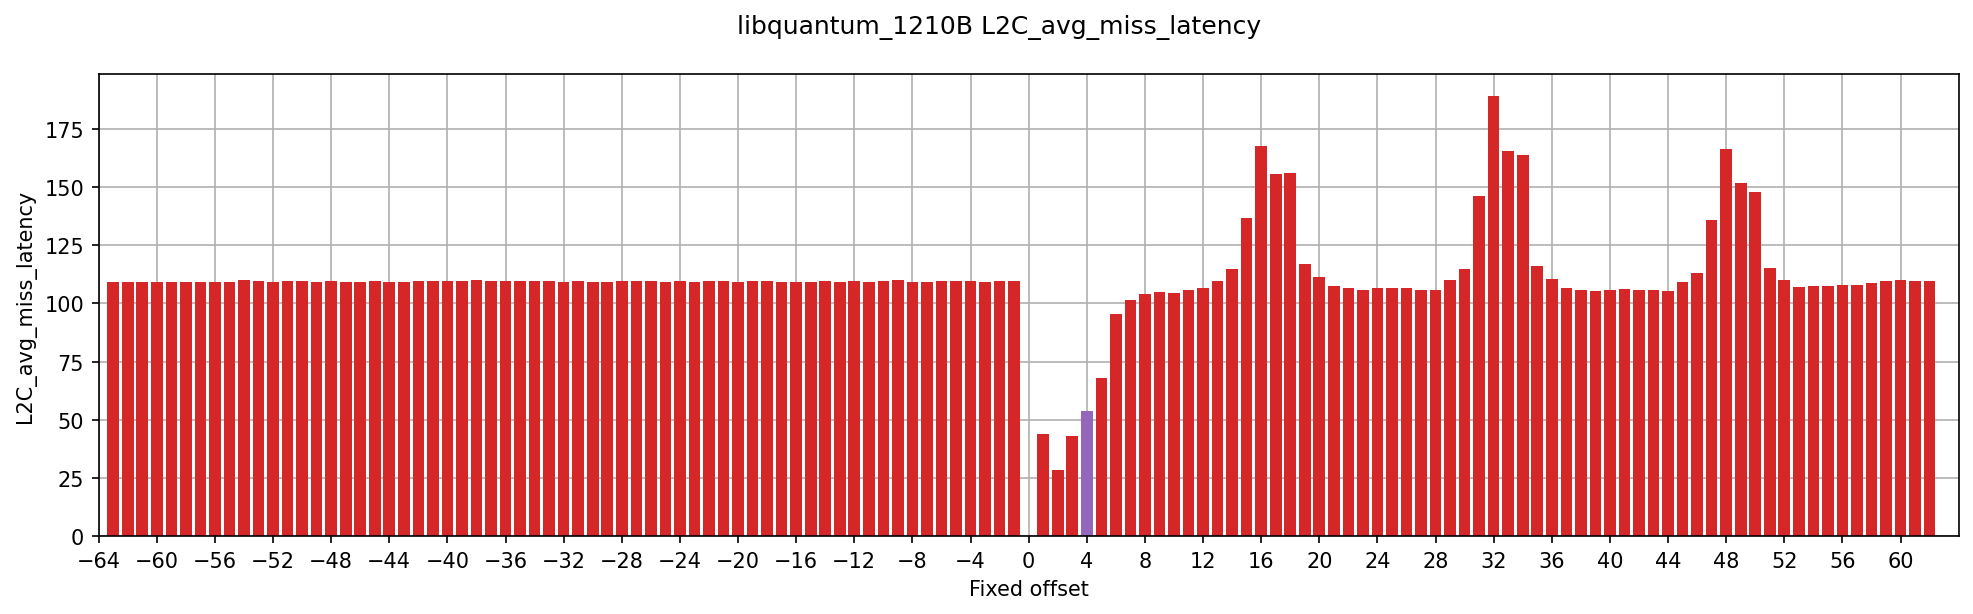

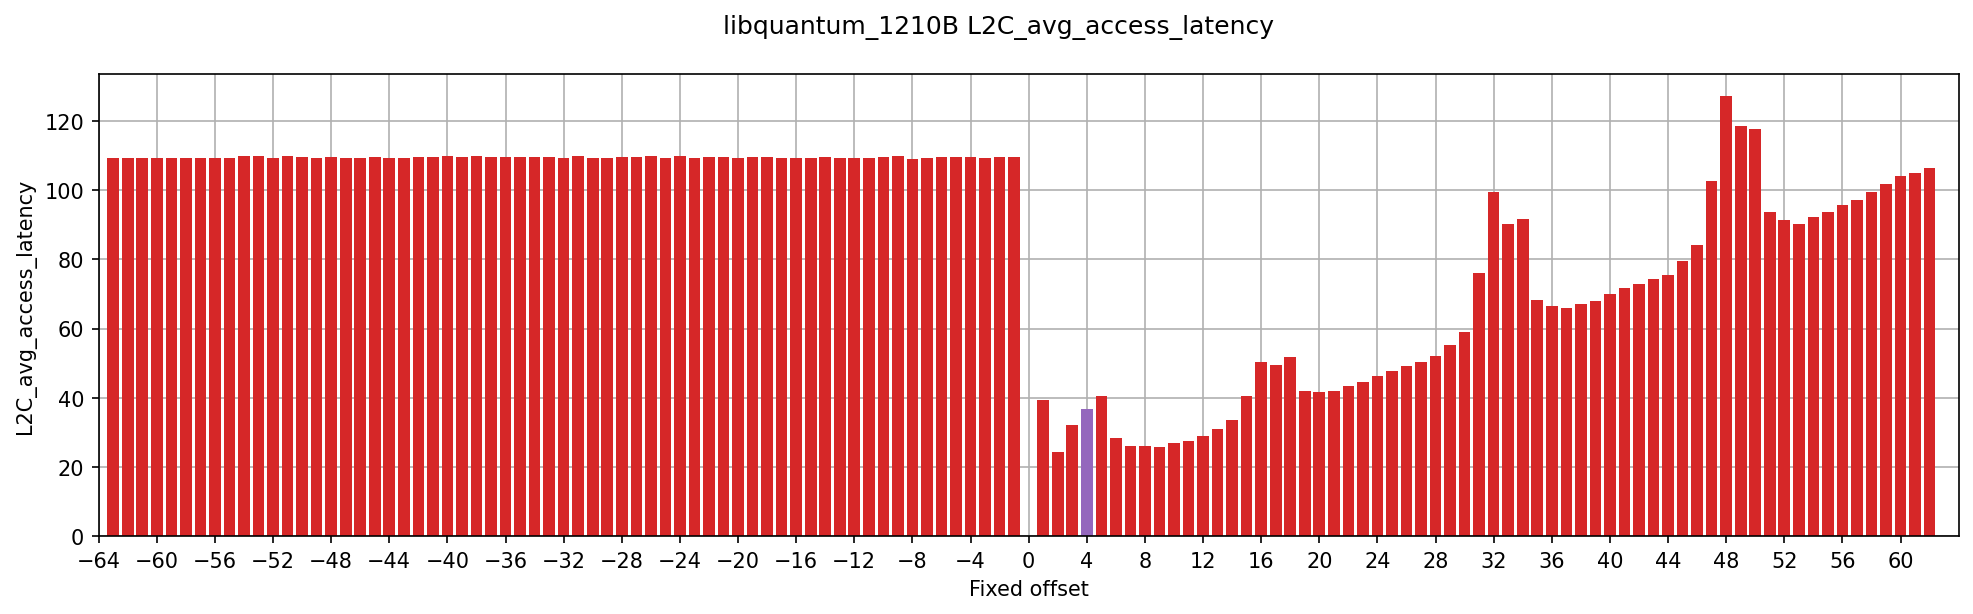

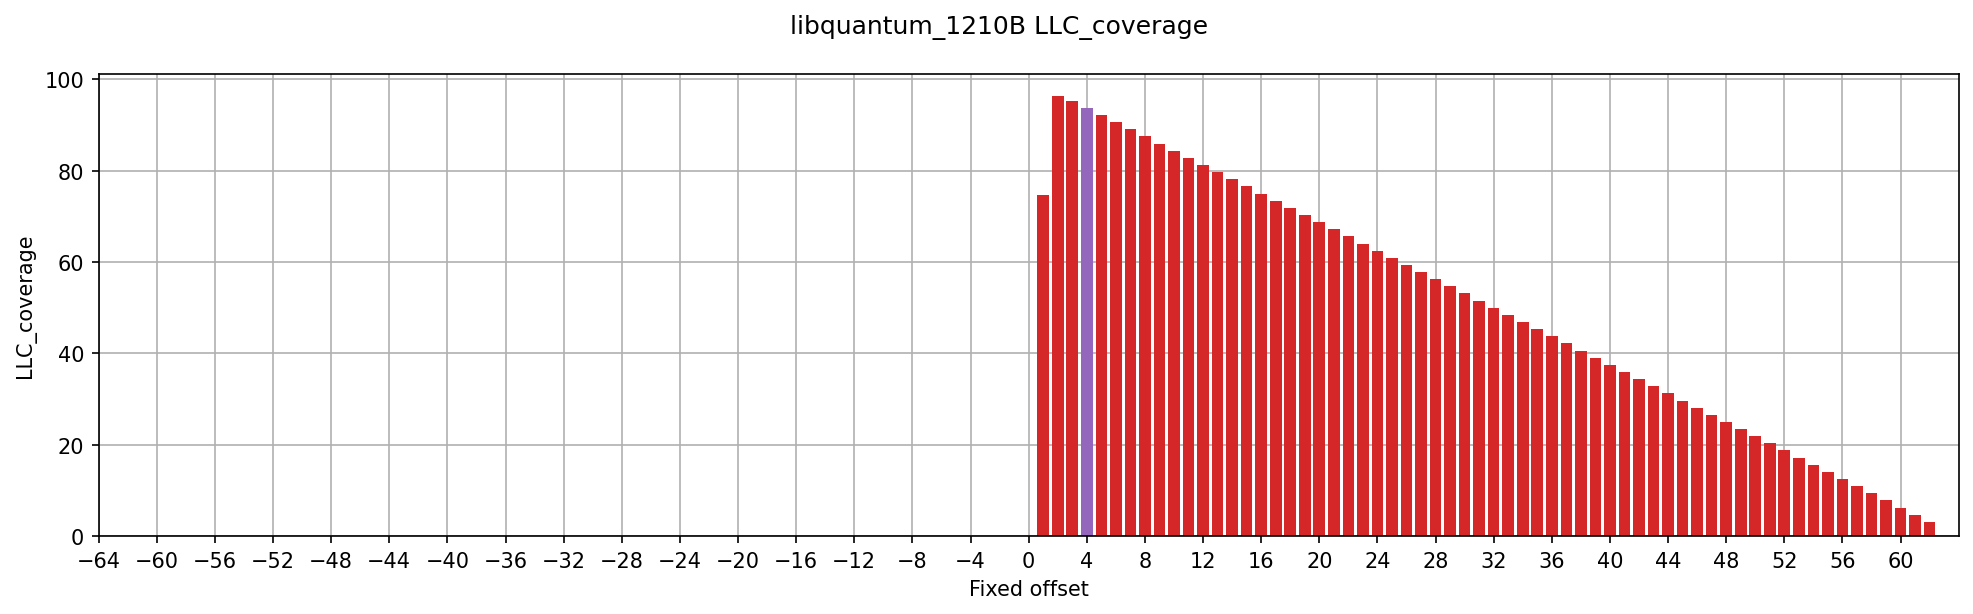

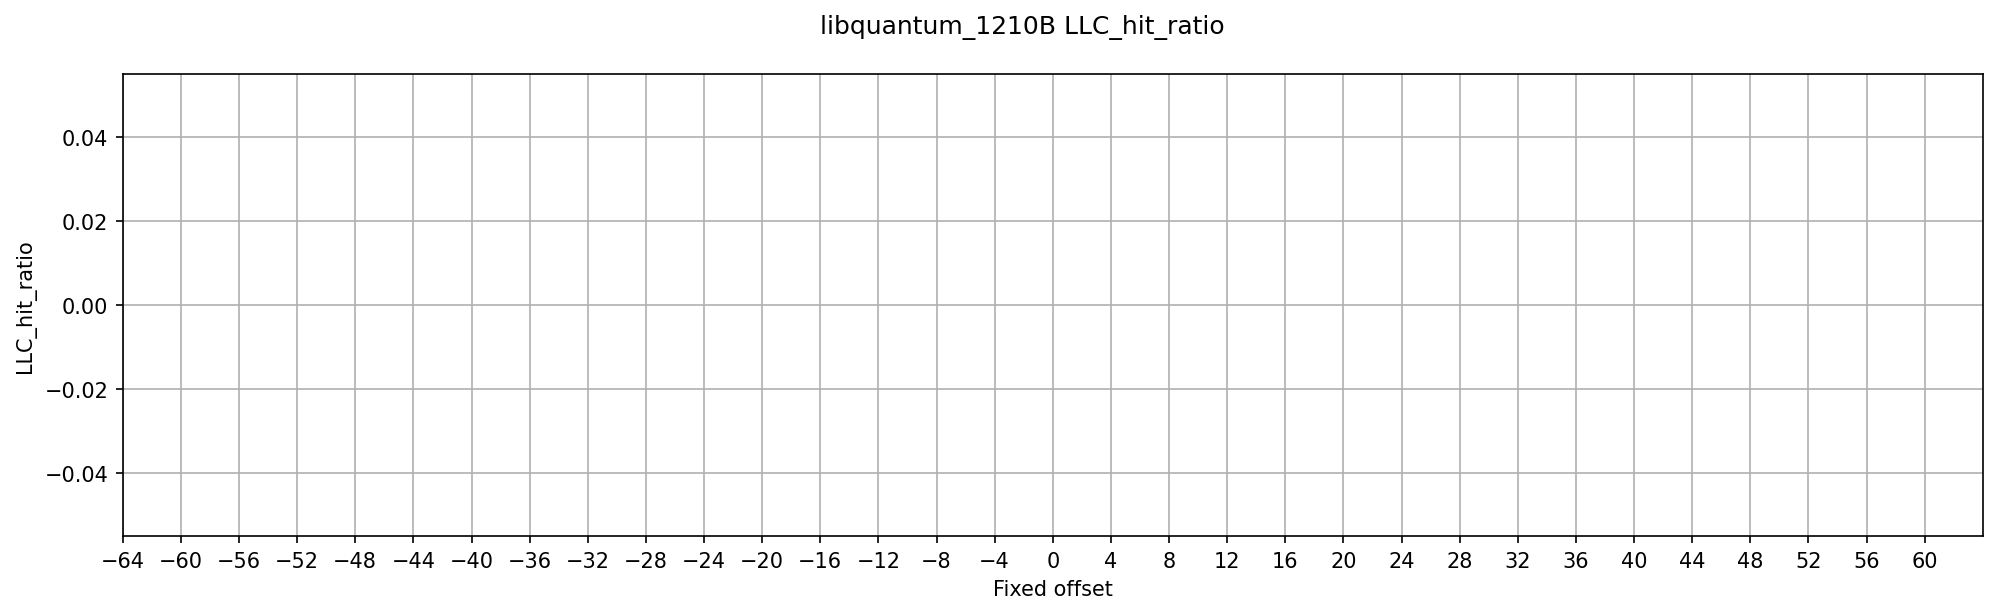

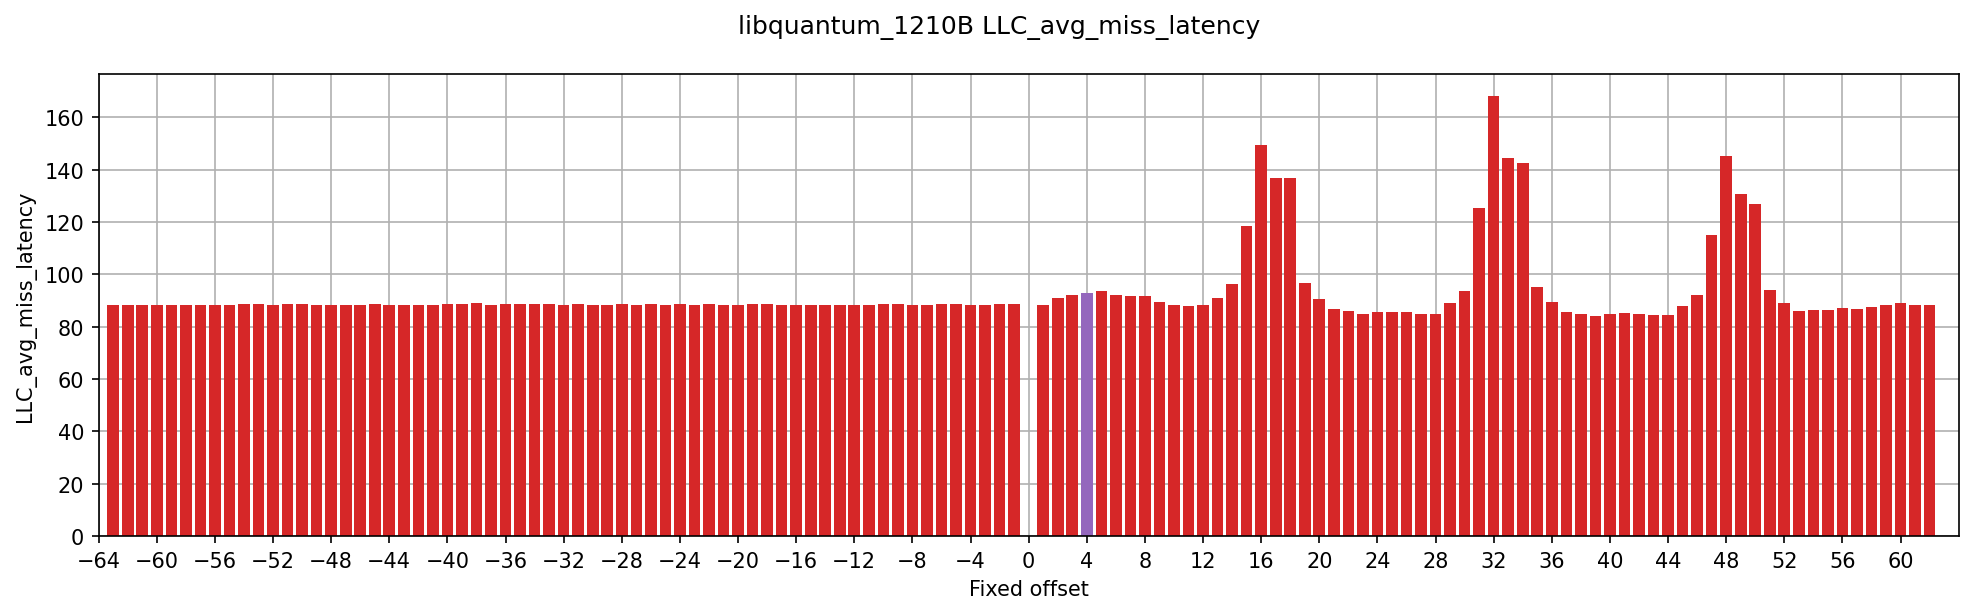

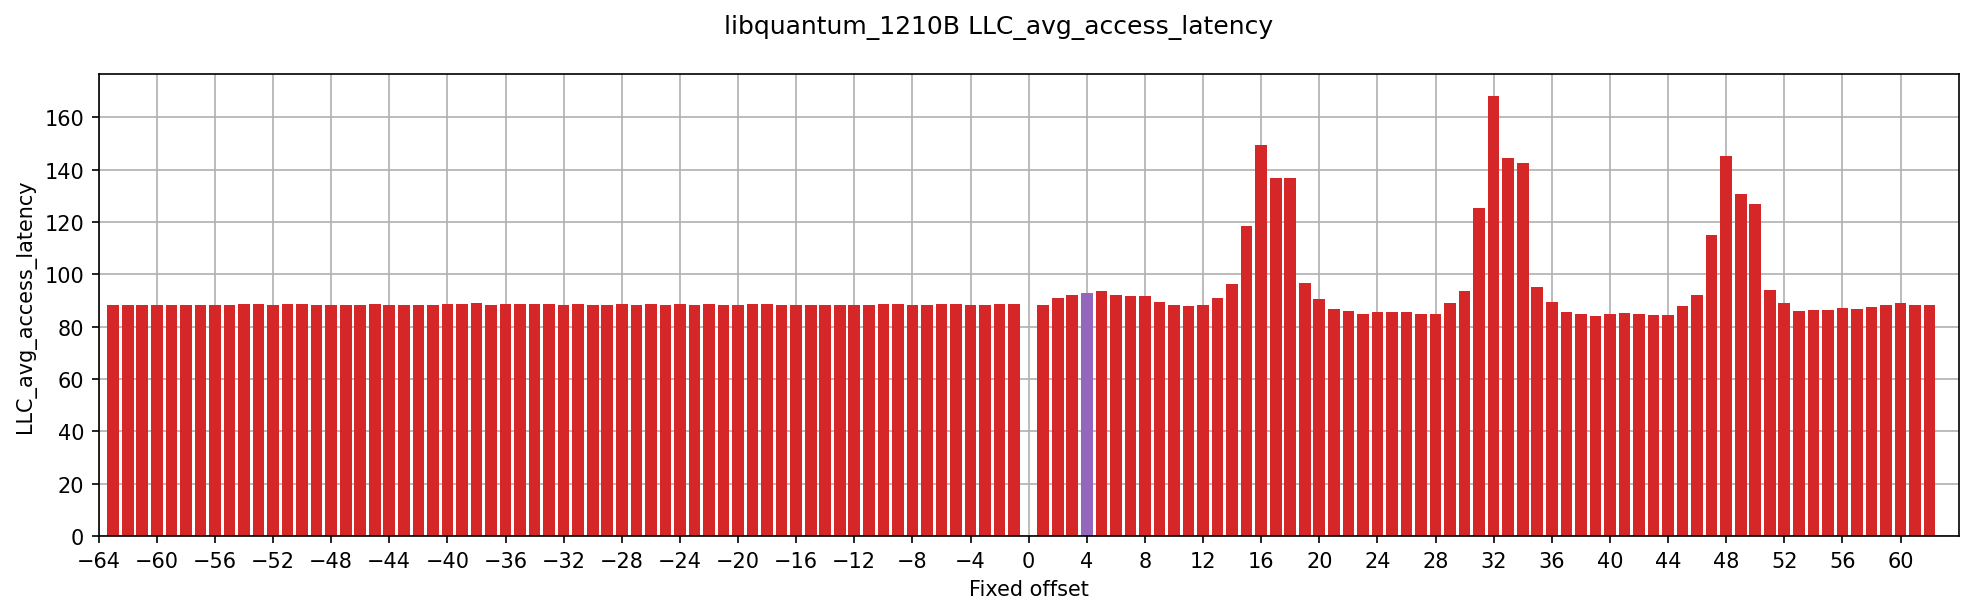

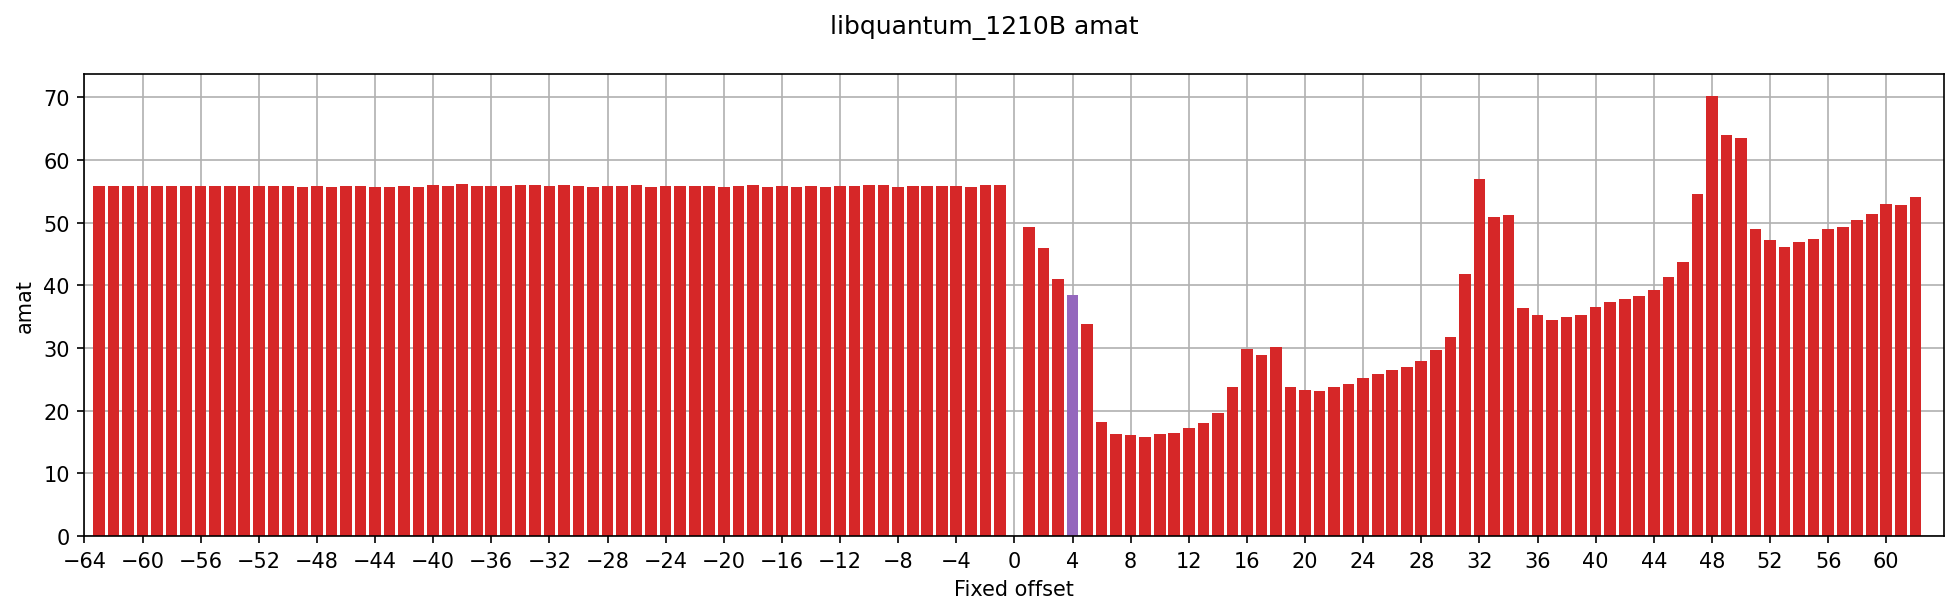

In [10]:
lines = {
    # 'bo -zero': 94.844144,
    # 'cygnus tuned -fallback -zero': 74.590936,
    # 'cygnus tuned timely acc': 102.138084,
    # 'pythia tuned -fallback -zero': 67.222444
}

for metric in metrics:
    plot_fixed_offsets(dfs, 'libquantum_1210B', metric, dpi=dpi, figsize=(16, 4), lines=lines, best_offset=4)

## soplex_66B

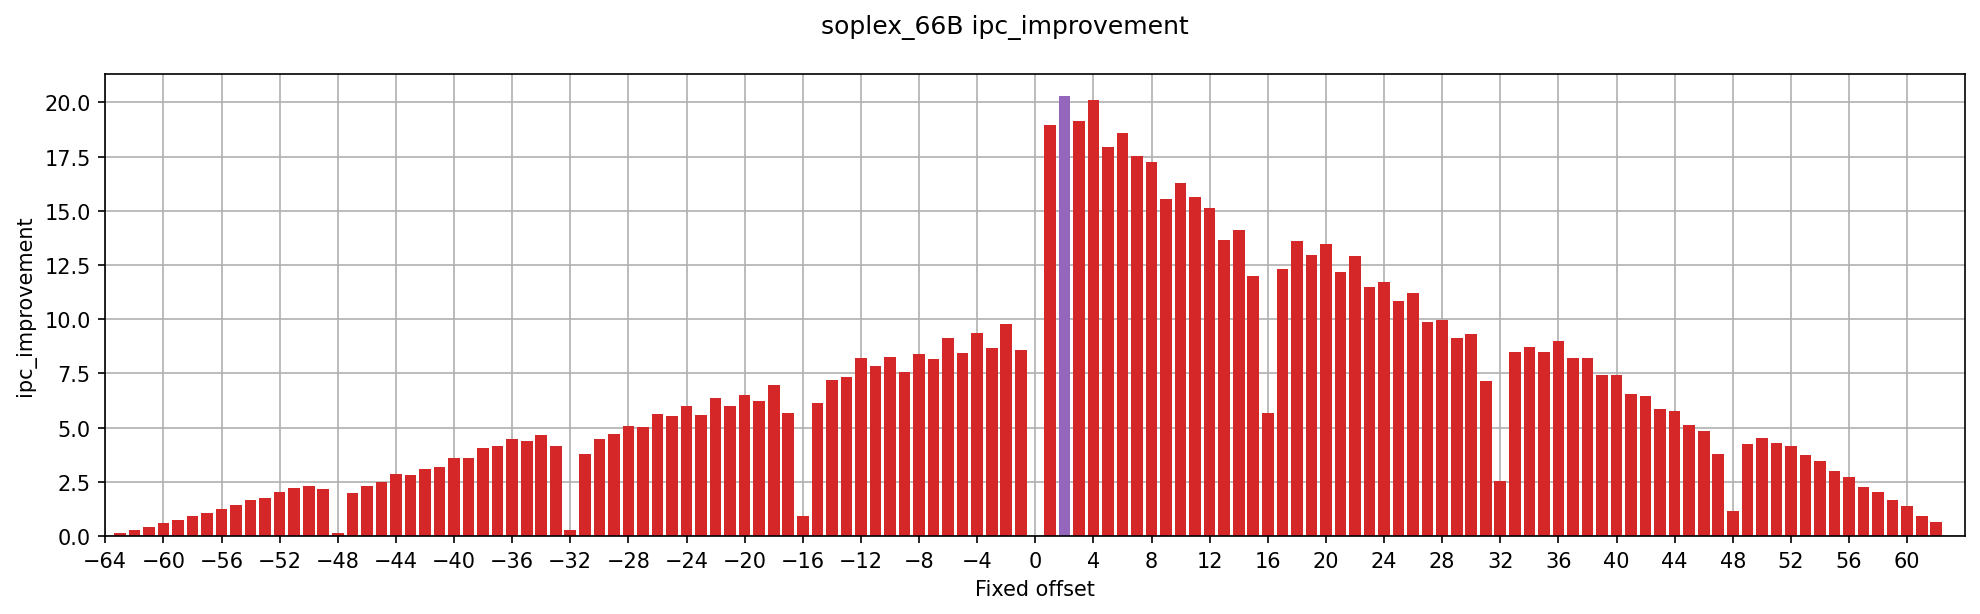

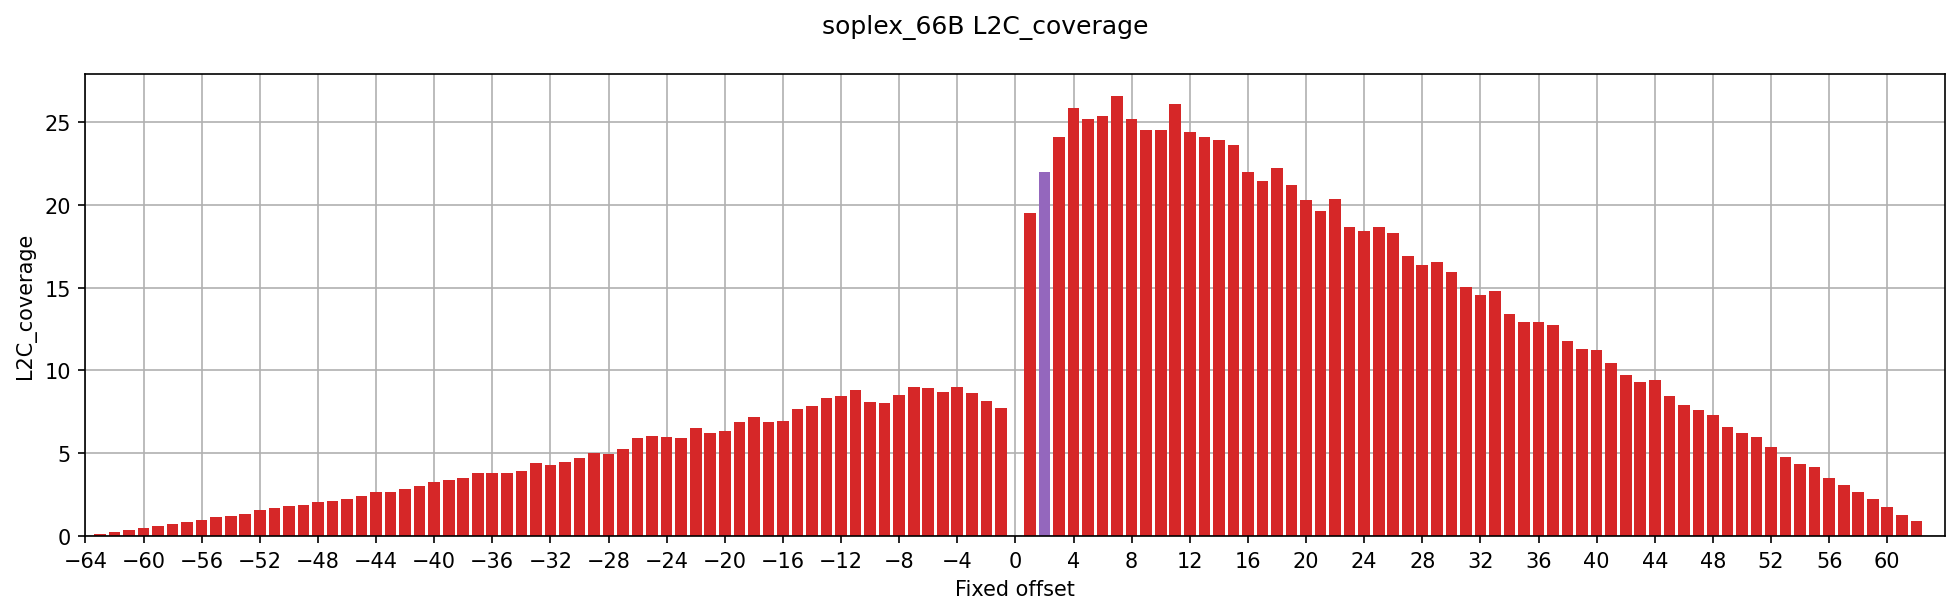

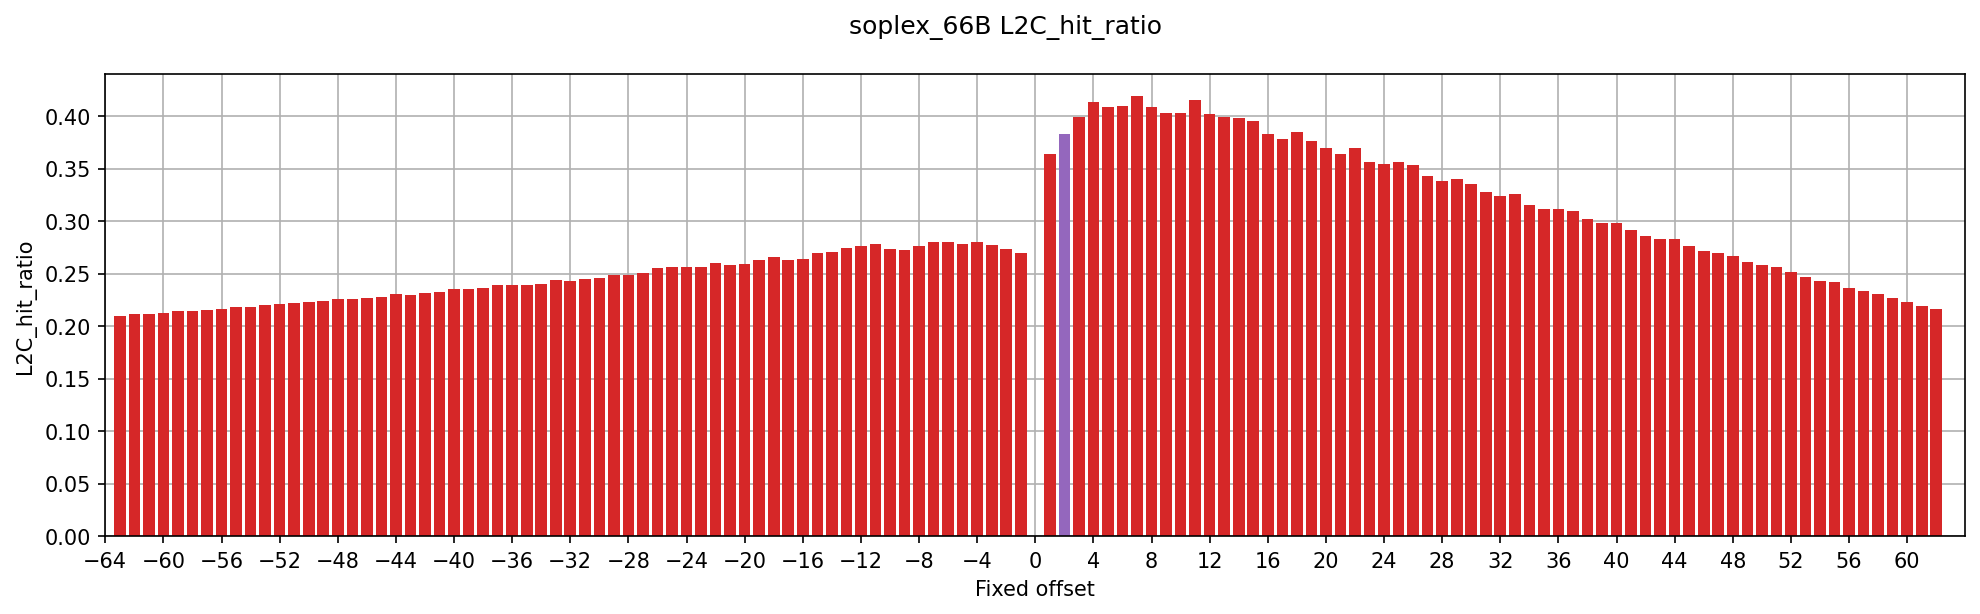

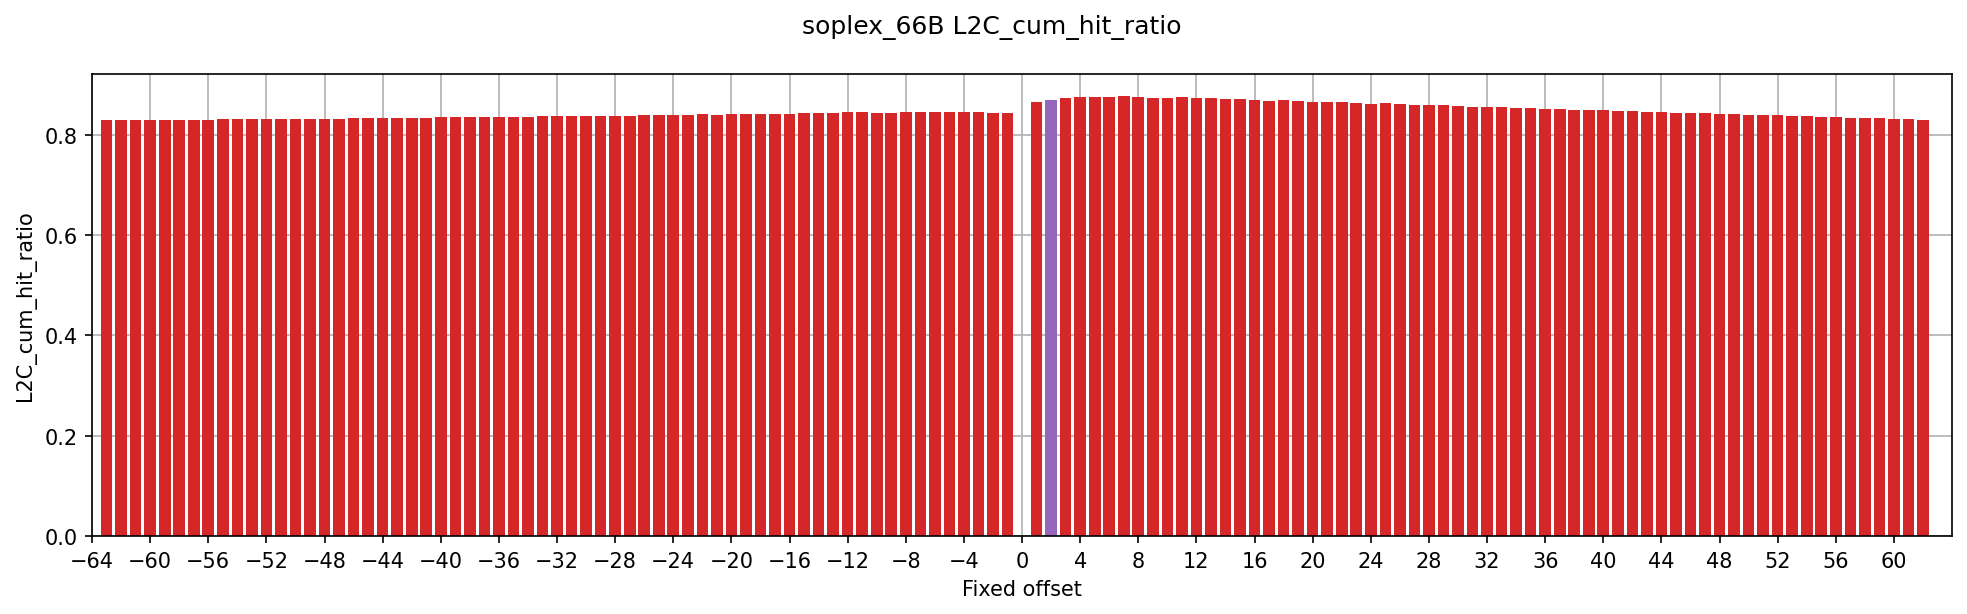

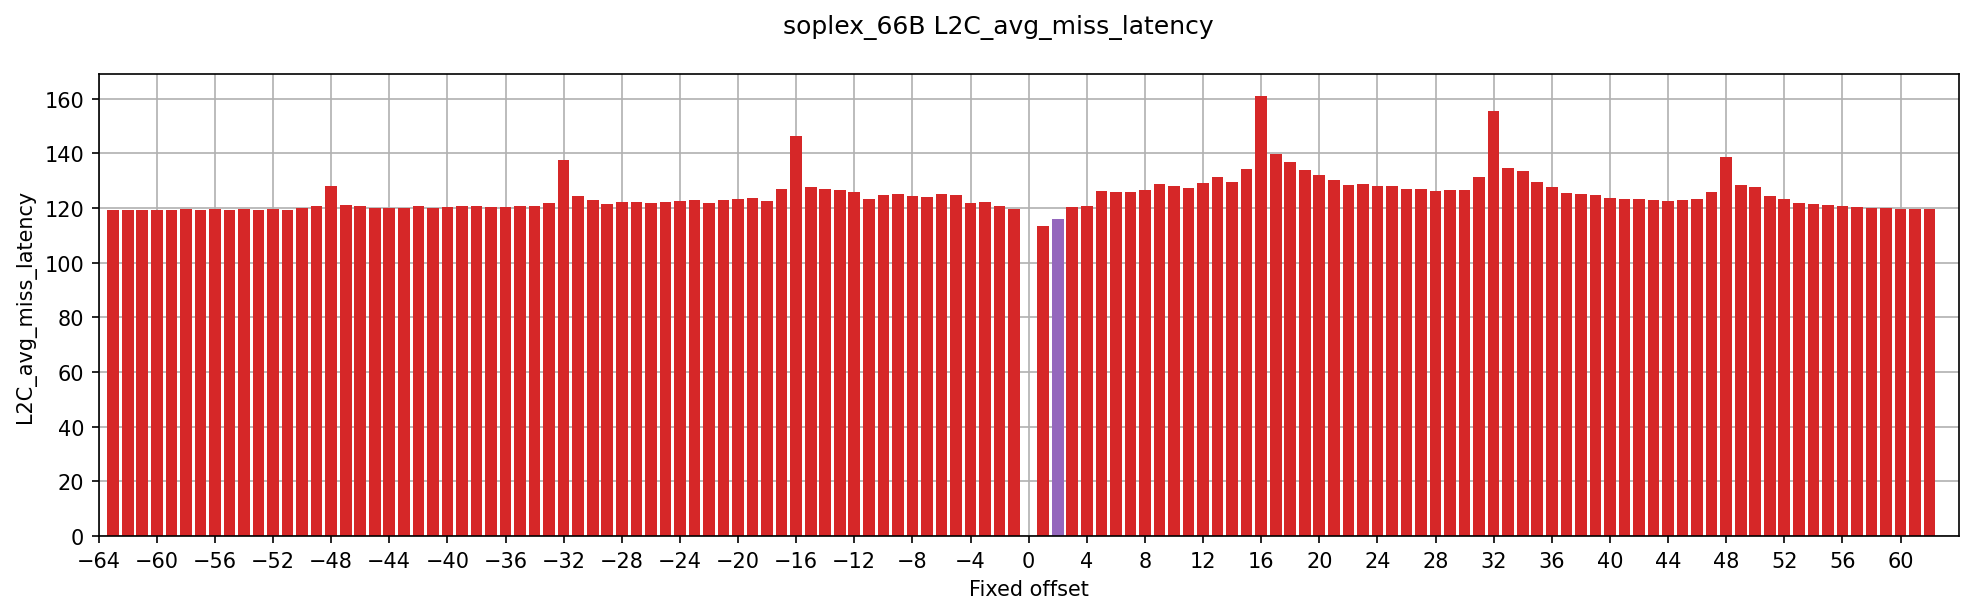

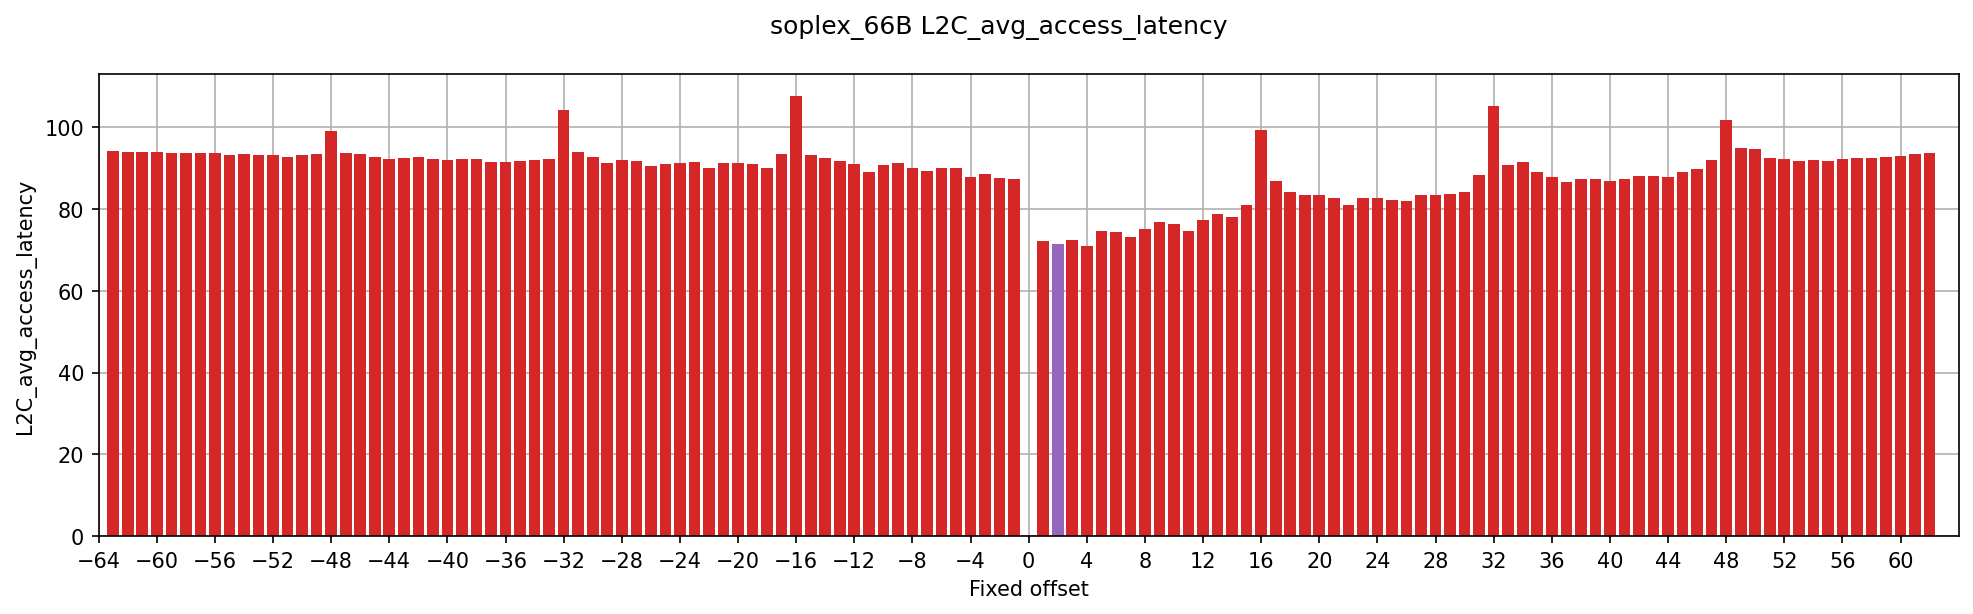

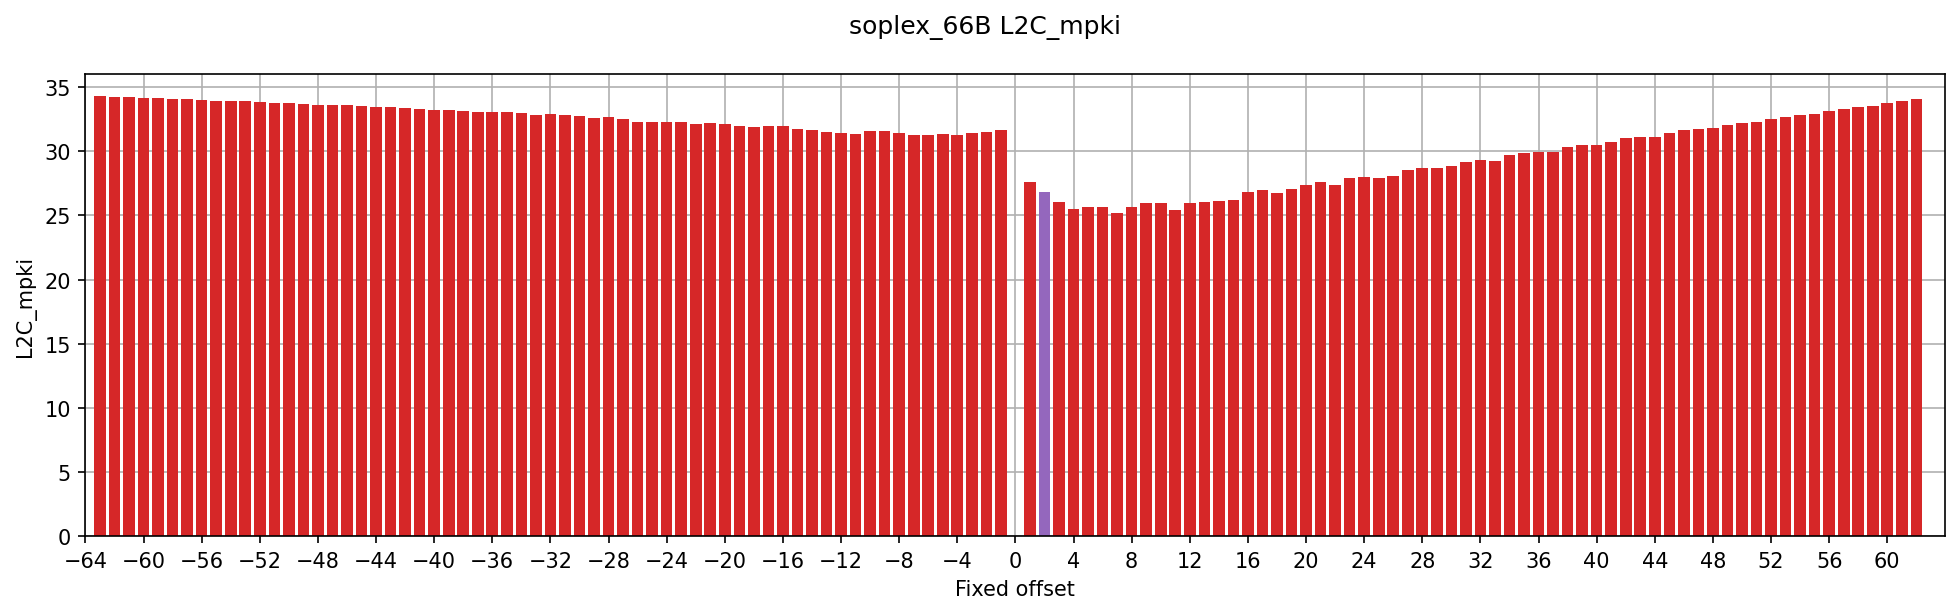

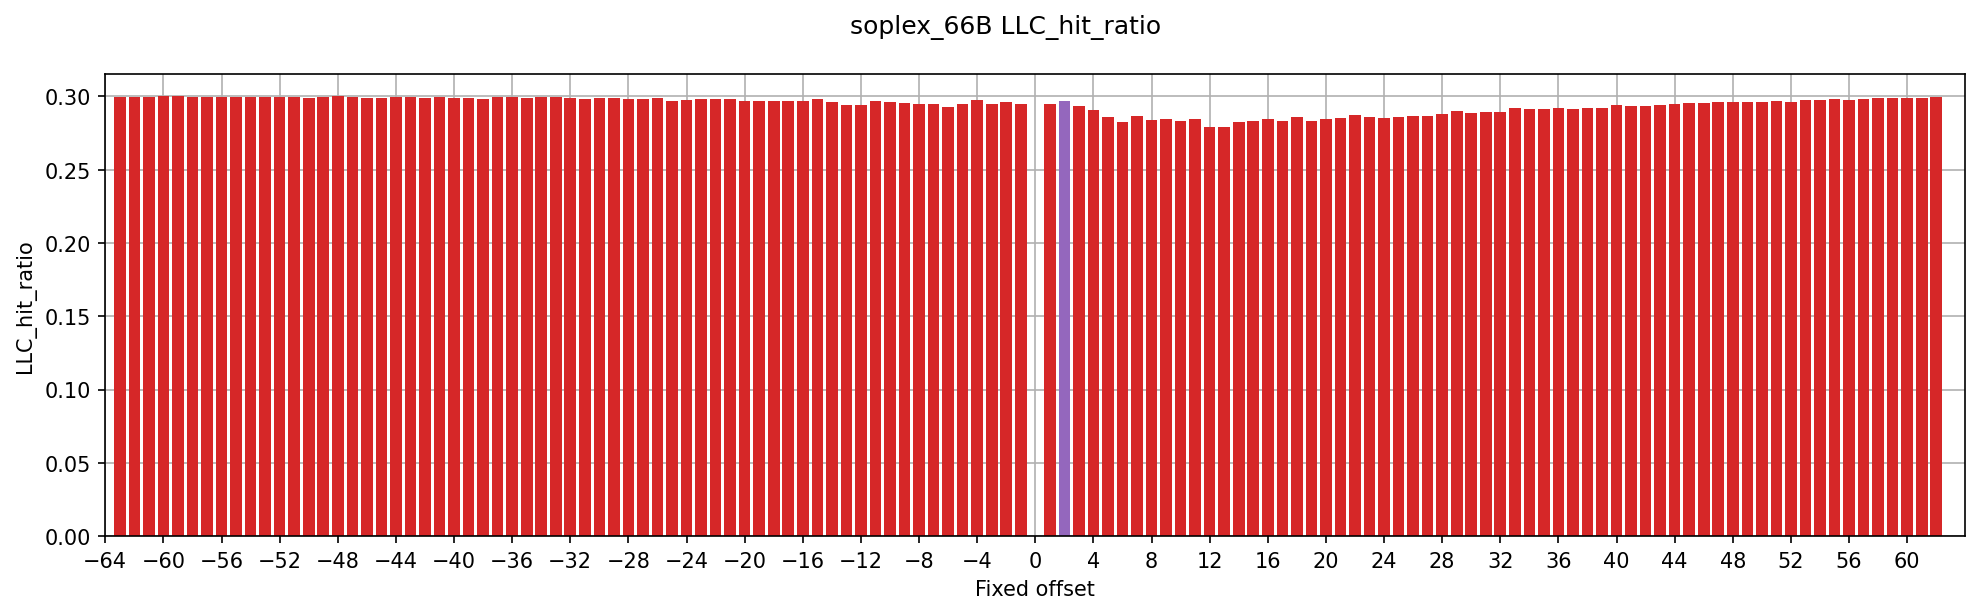

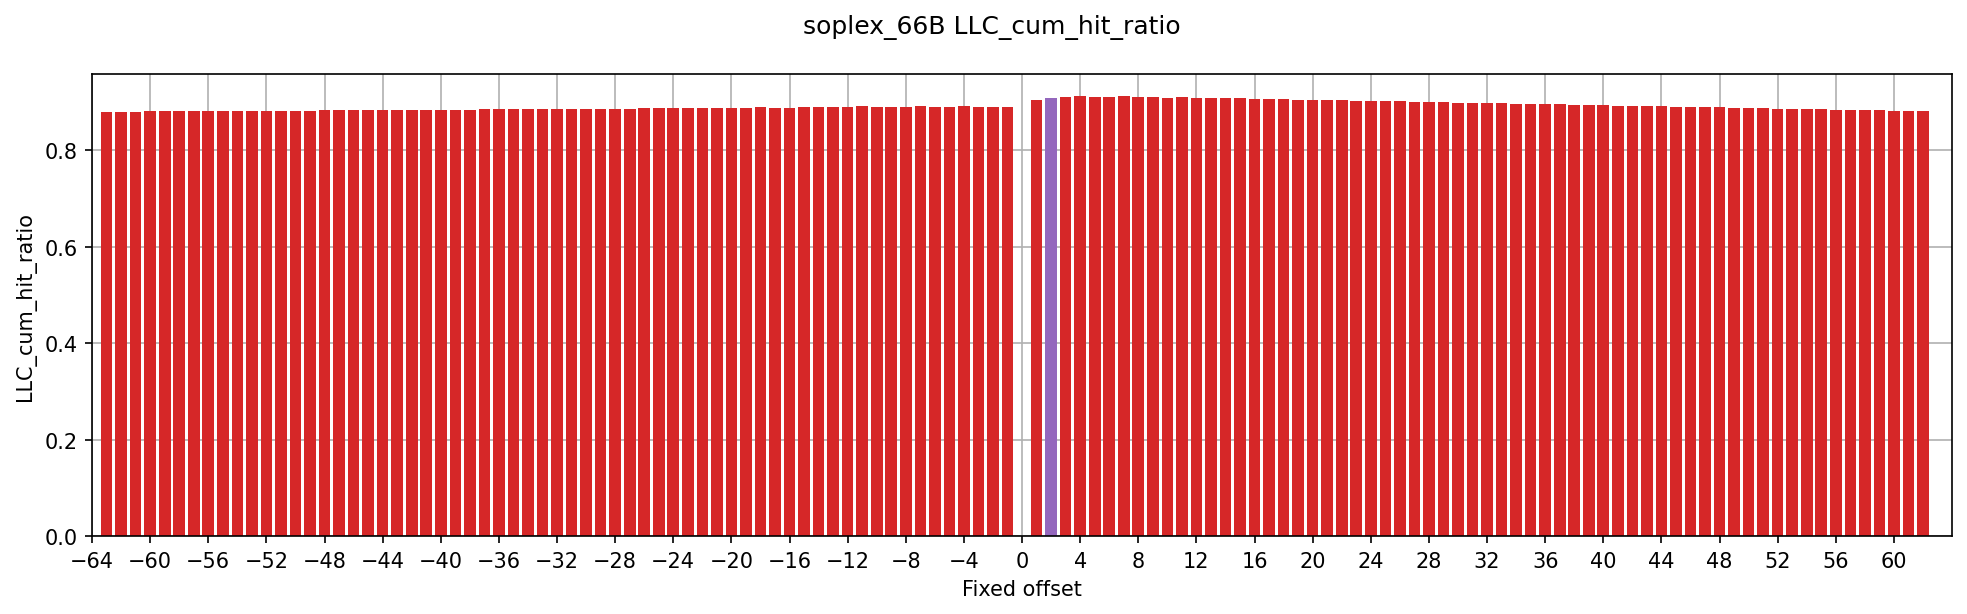

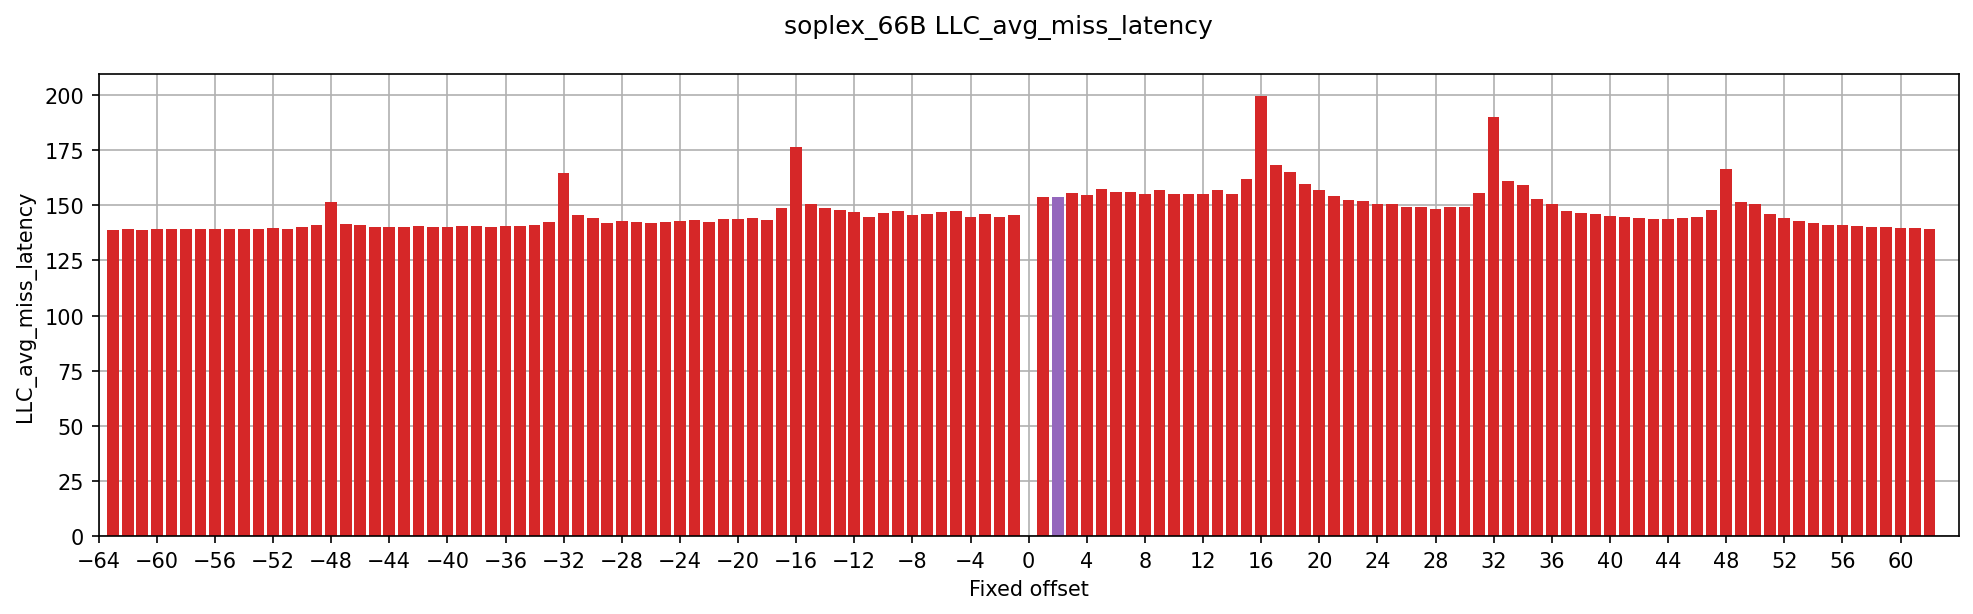

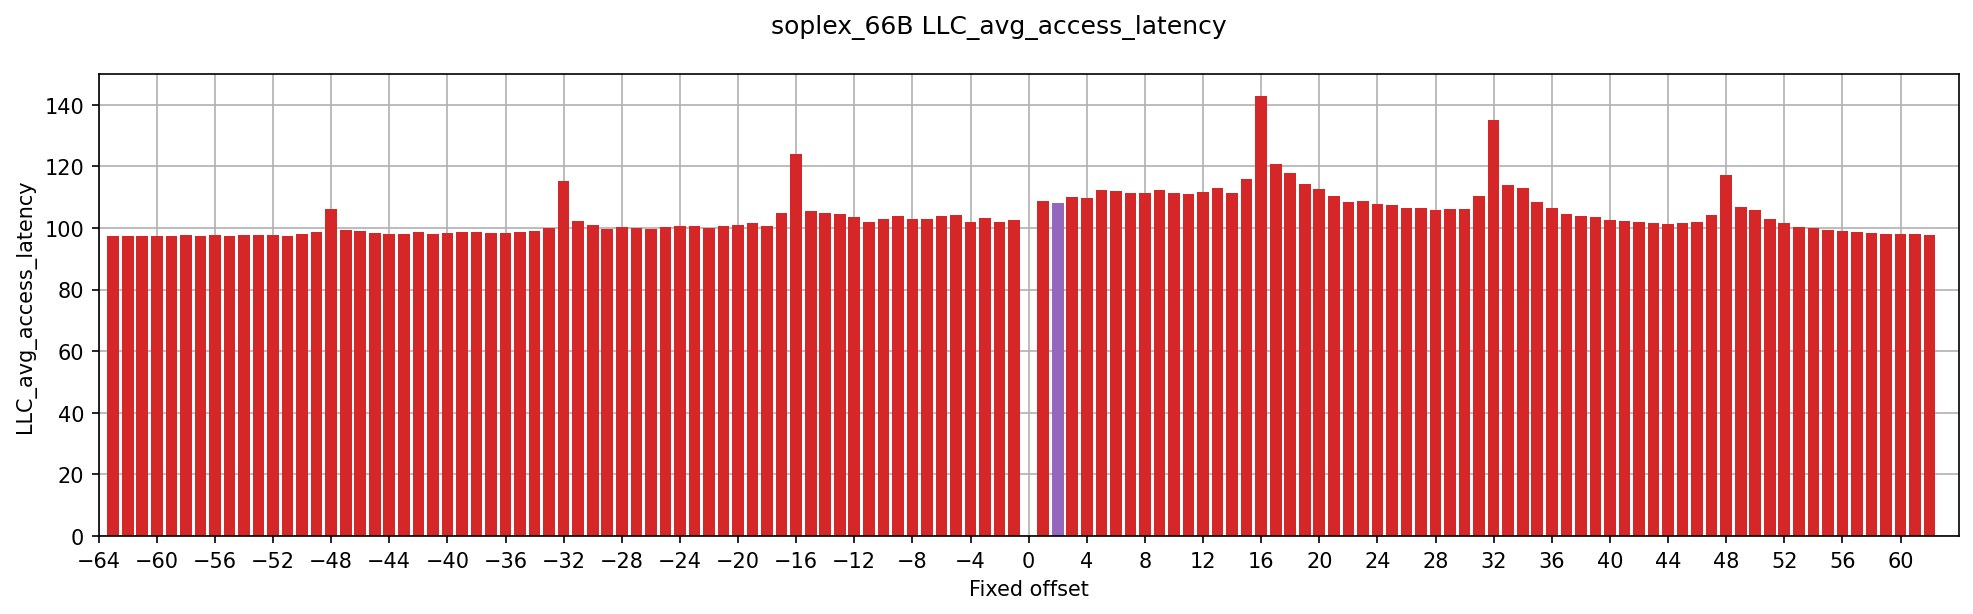

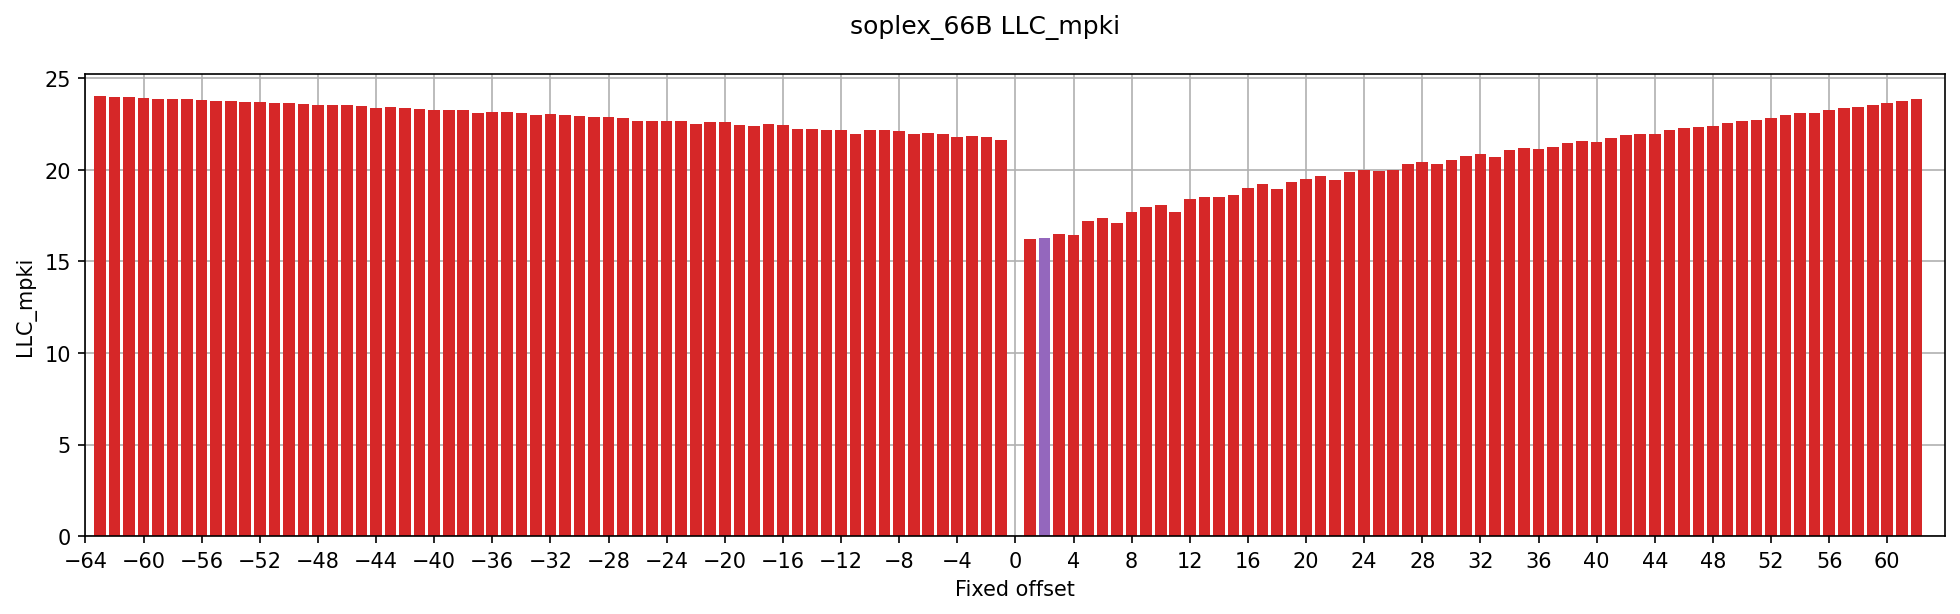

In [26]:
for metric in metrics:
    plot_fixed_offsets(dfs, 'soplex_66B', metric, dpi=dpi, figsize=(16, 4), best_offset=2)

# Tables

## ipc_improvement

In [7]:
def table_metric(offsets_df, traces, metric='ipc_improvement'):
    trace_metrics = defaultdict(list)

    for offset, df in offsets_df.items():
        trace_metrics['offset'].append(offset)
        for trace in traces:
            trace_metrics[trace].append(df[df.cpu0_full_trace == trace][metric].item())

    df = pd.DataFrame(trace_metrics).set_index('offset')
    pd.set_option('display.max_rows', None)
    display(df)

In [8]:
table_metric(dfs, ['mcf_46B', 'libquantum_1210B'], 'ipc_improvement')

ValueError: can only convert an array of size 1 to a Python scalar